# Machine learning mini project :-
## dry beans (multiclass classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import time
import sklearn
import collections
%matplotlib inline

In [2]:
df1=pd.read_excel("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\Dry_Bean_Dataset.xlsx")
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
df1.duplicated().sum()

68

In [4]:
df1.drop_duplicates(inplace=True)

In [5]:
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
df1.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
df1['class']=pd.factorize(df1['Class'])[0]
df1.drop(['Class'],axis=1,inplace=True)

In [8]:
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,6
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,6
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,6
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,6


## VIF

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
m=df1.drop(['class'],axis=1)
vif=pd.DataFrame({'variables':m.columns})
vif['vif']=[variance_inflation_factor(m.values,r)
           for r in range(len(m.columns))]
vif

,variables,vif
0,Area,3.443408e+05
1,Perimeter,6.021611e+04
2,MajorAxisLength,1.317358e+06
3,MinorAxisLength,1.652830e+06
4,AspectRation,1.682818e+05
5,Eccentricity,2.341323e+04
6,ConvexArea,3.321269e+05
7,EquivDiameter,6.100438e+06
8,Extent,2.933328e+02
9,Solidity,6.280427e+05


# Correlation between all the independent variable

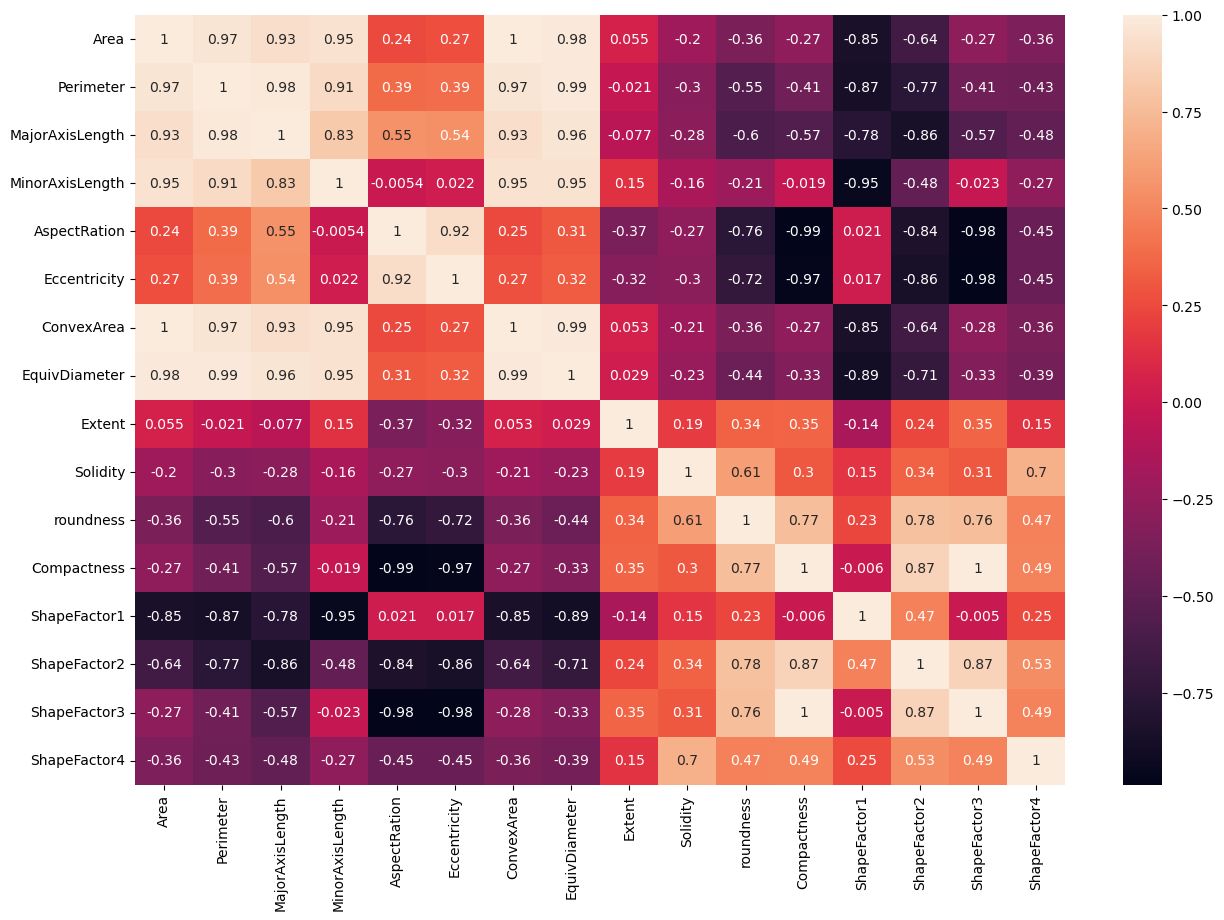

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(m.corr(),annot=True)
plt.show()

In [12]:
df1.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078,3.629329
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347,2.157018
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720,2.000000
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393,4.000000
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891,6.000000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


In [13]:
df1.info

<bound method DataFrame.info of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity 

In [14]:
df1['class'].value_counts()

6    3546
5    2636
0    2027
4    1860
3    1630
1    1322
2     522
Name: class, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

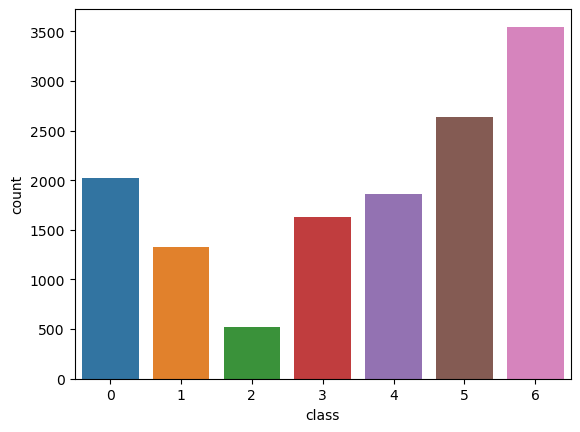

In [15]:
sns.countplot(df1['class'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


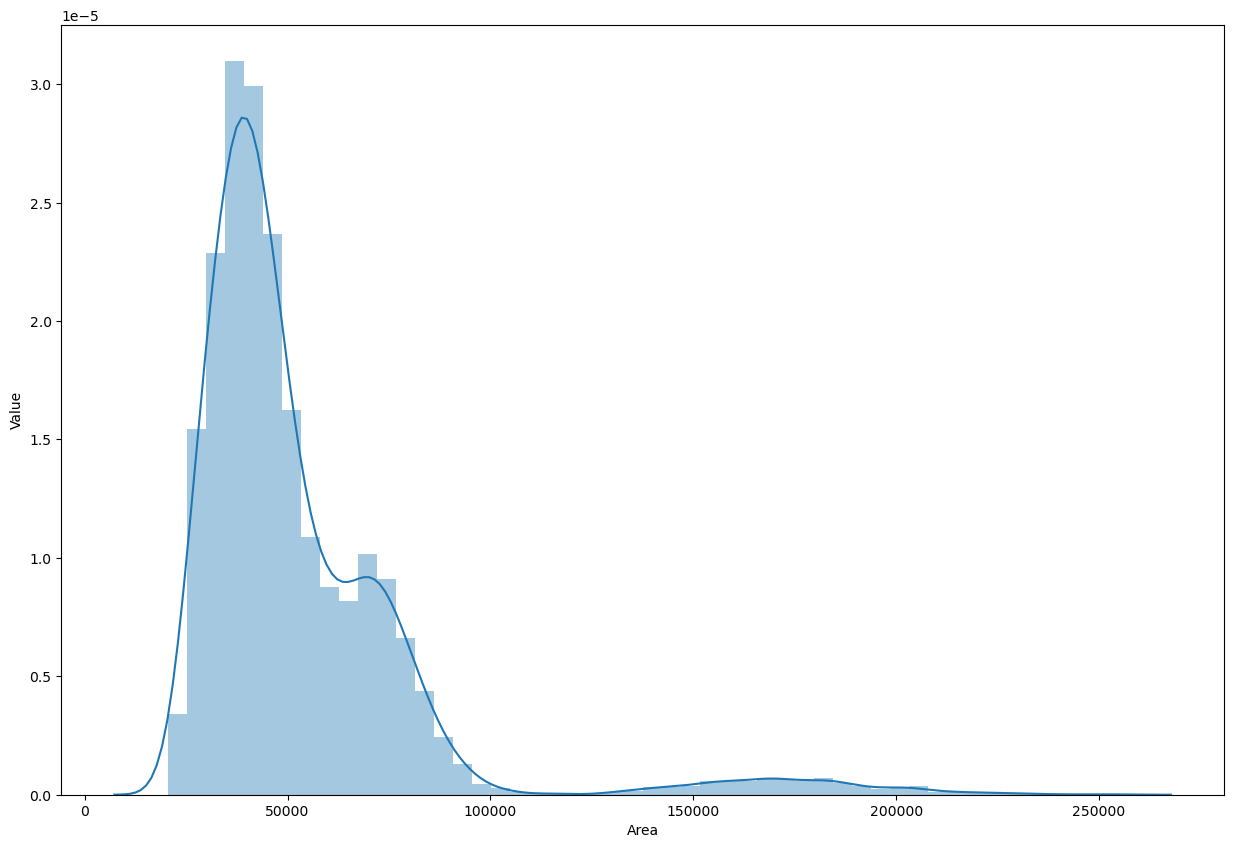

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


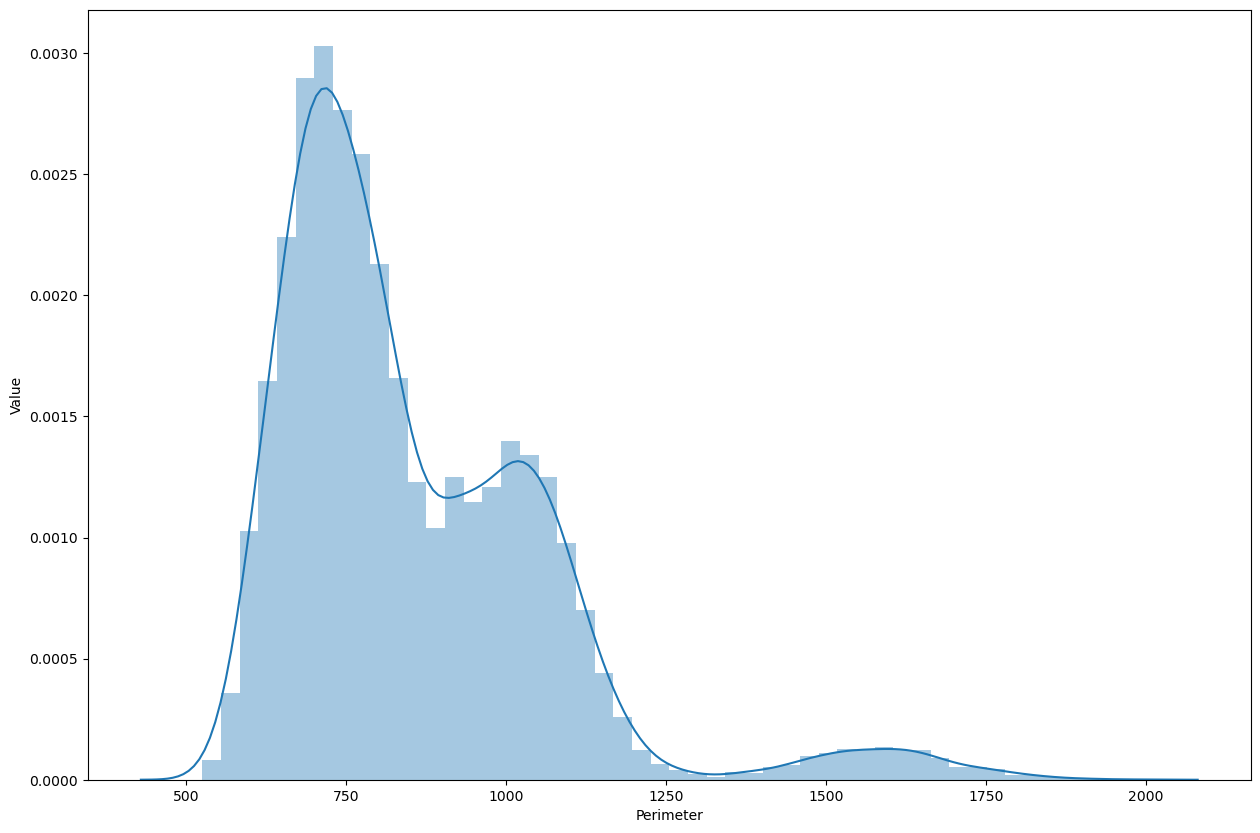

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


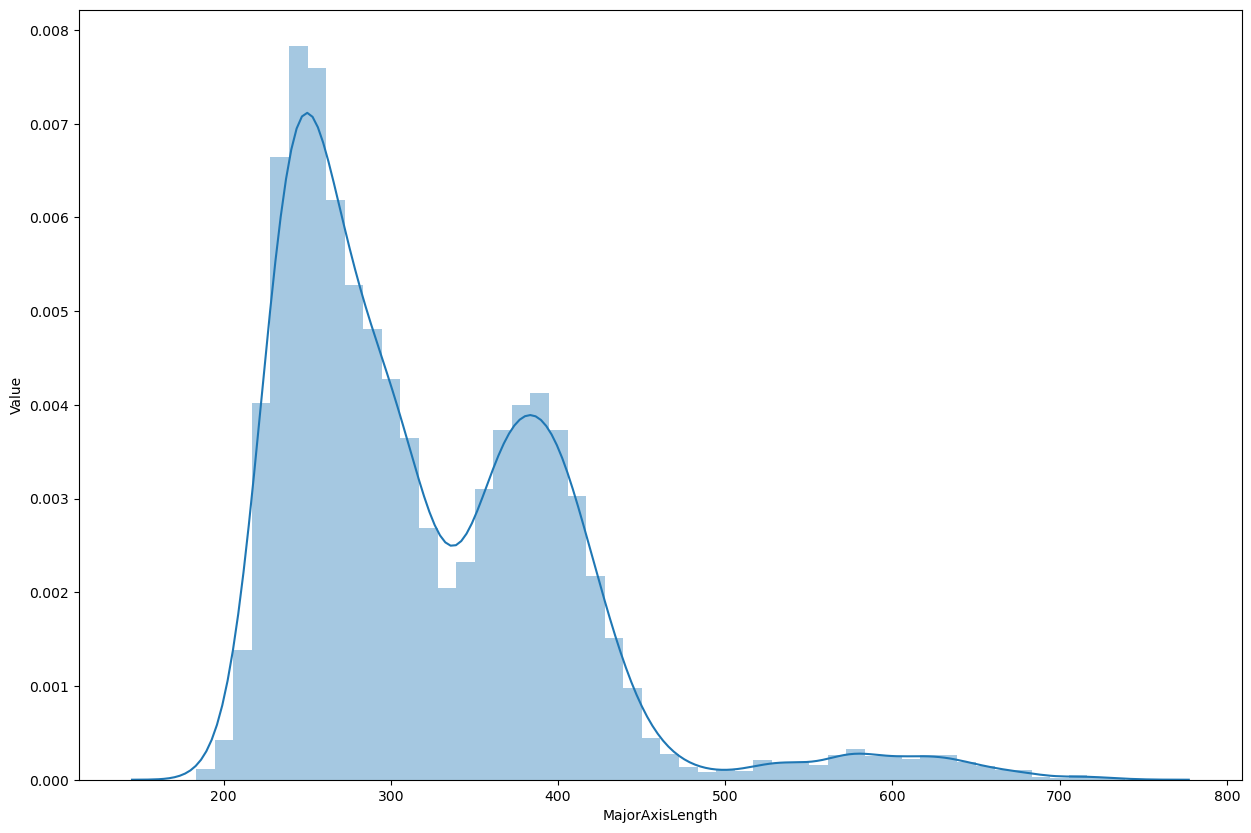

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


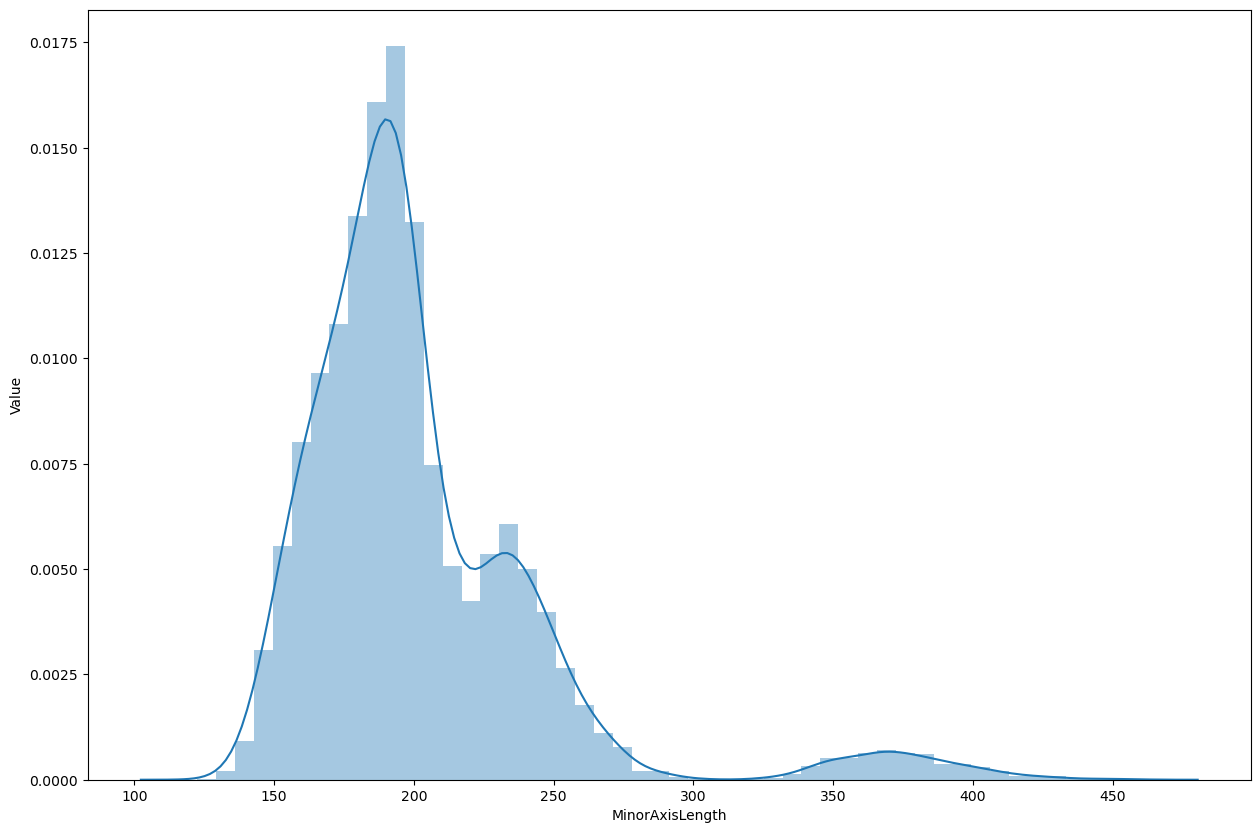

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


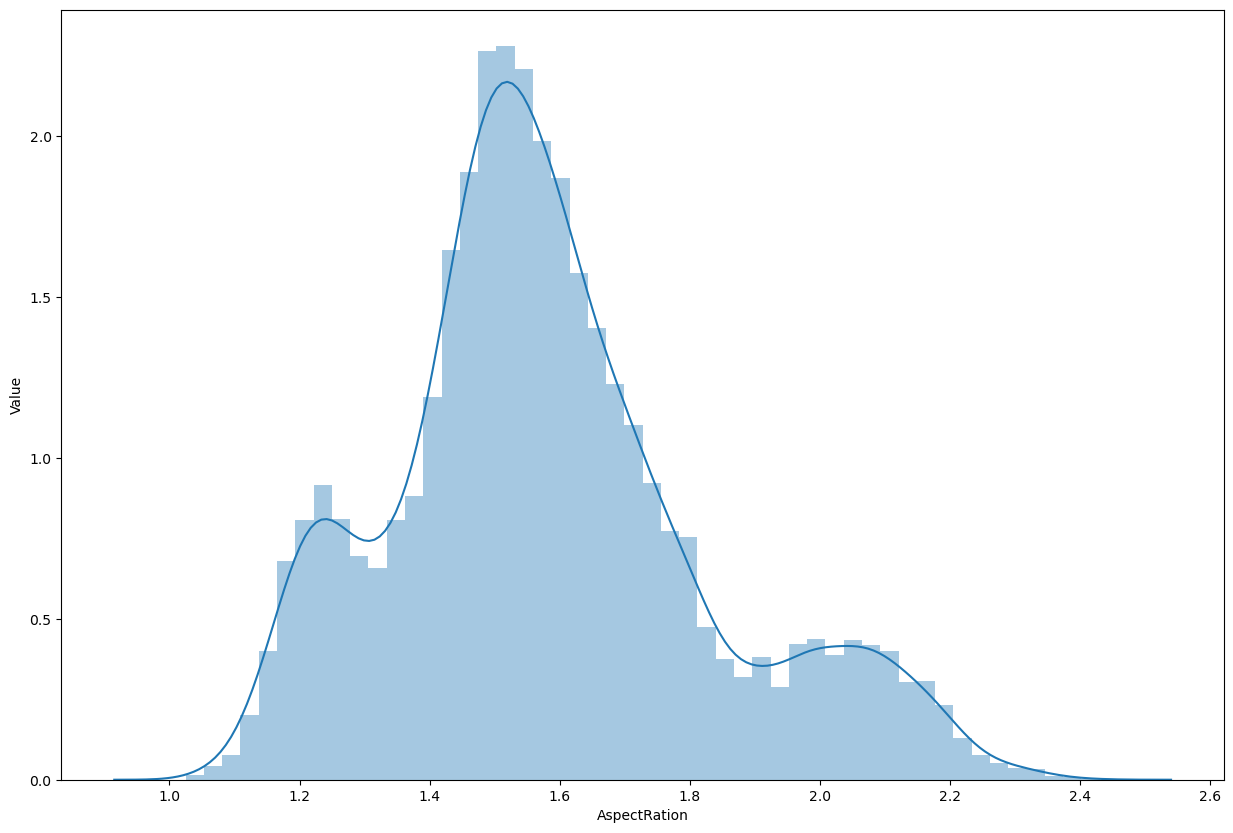

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


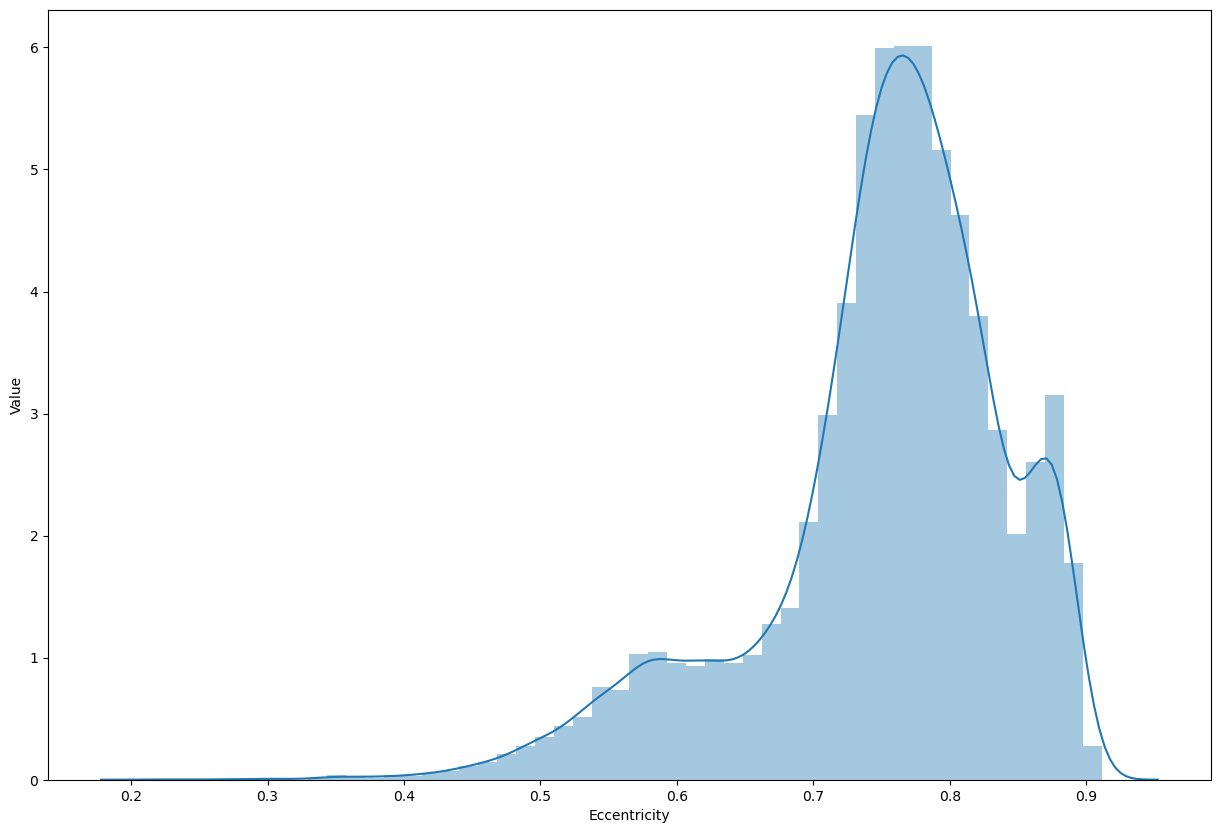

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


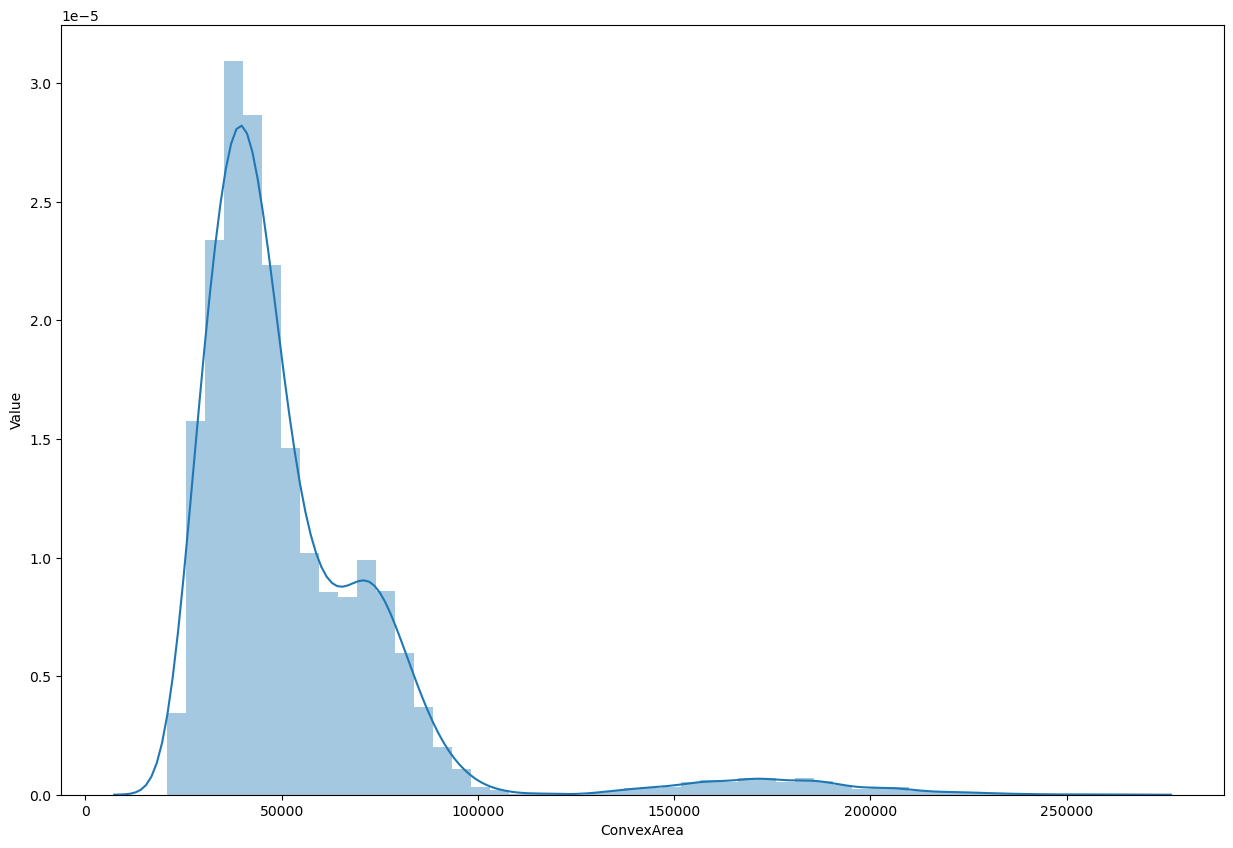

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


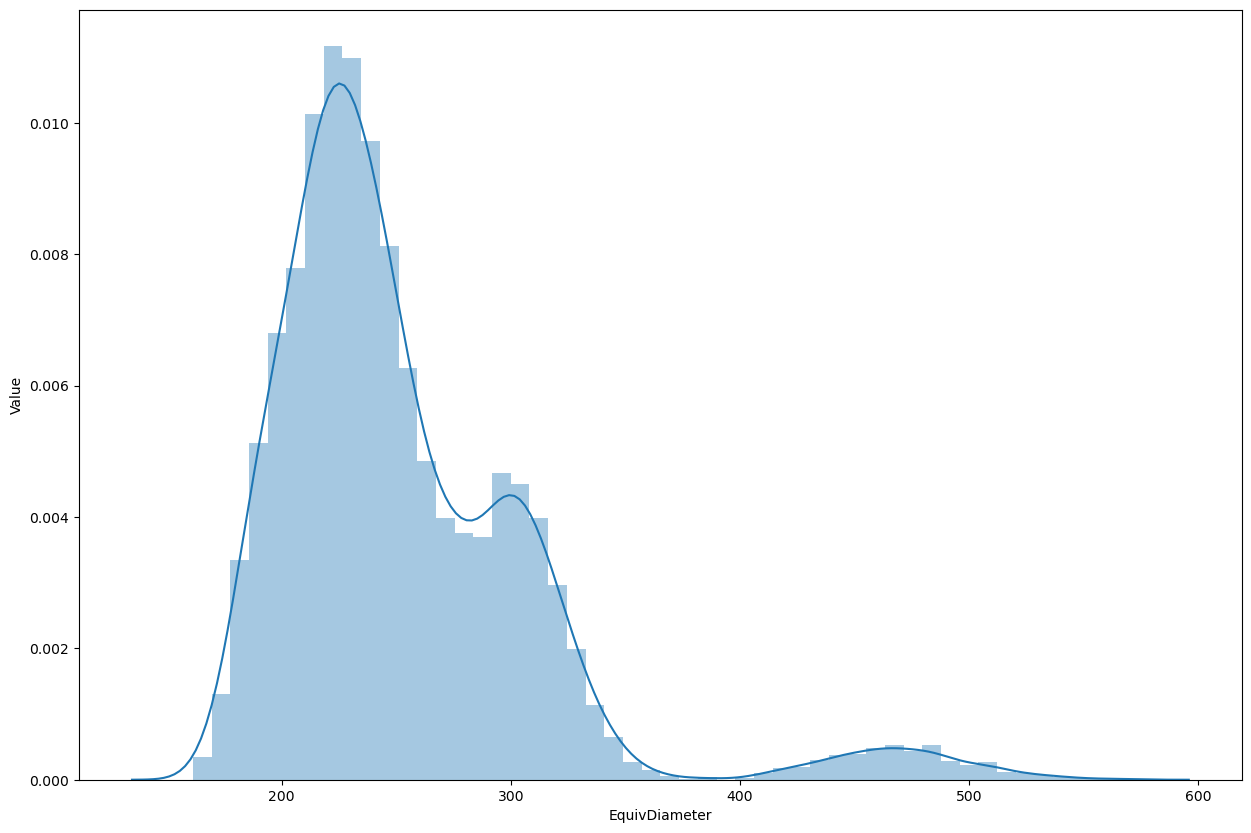

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


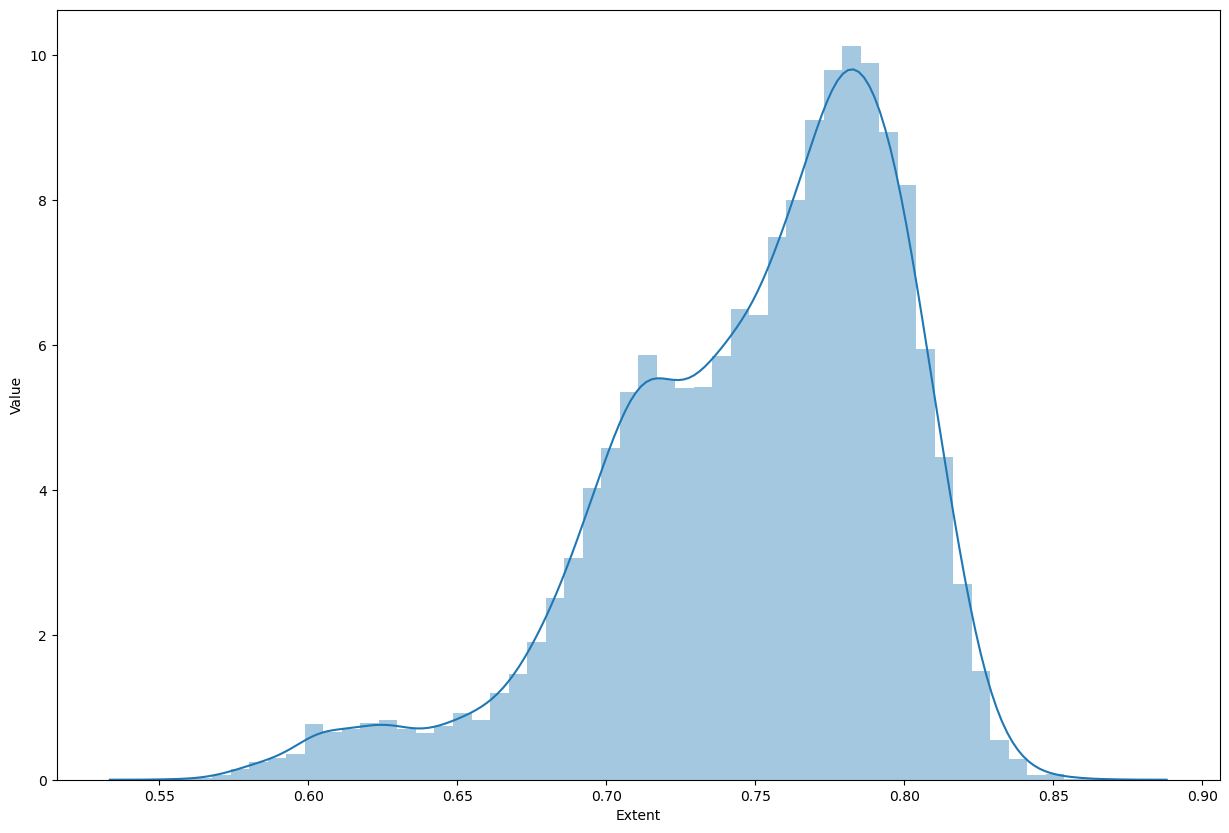

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


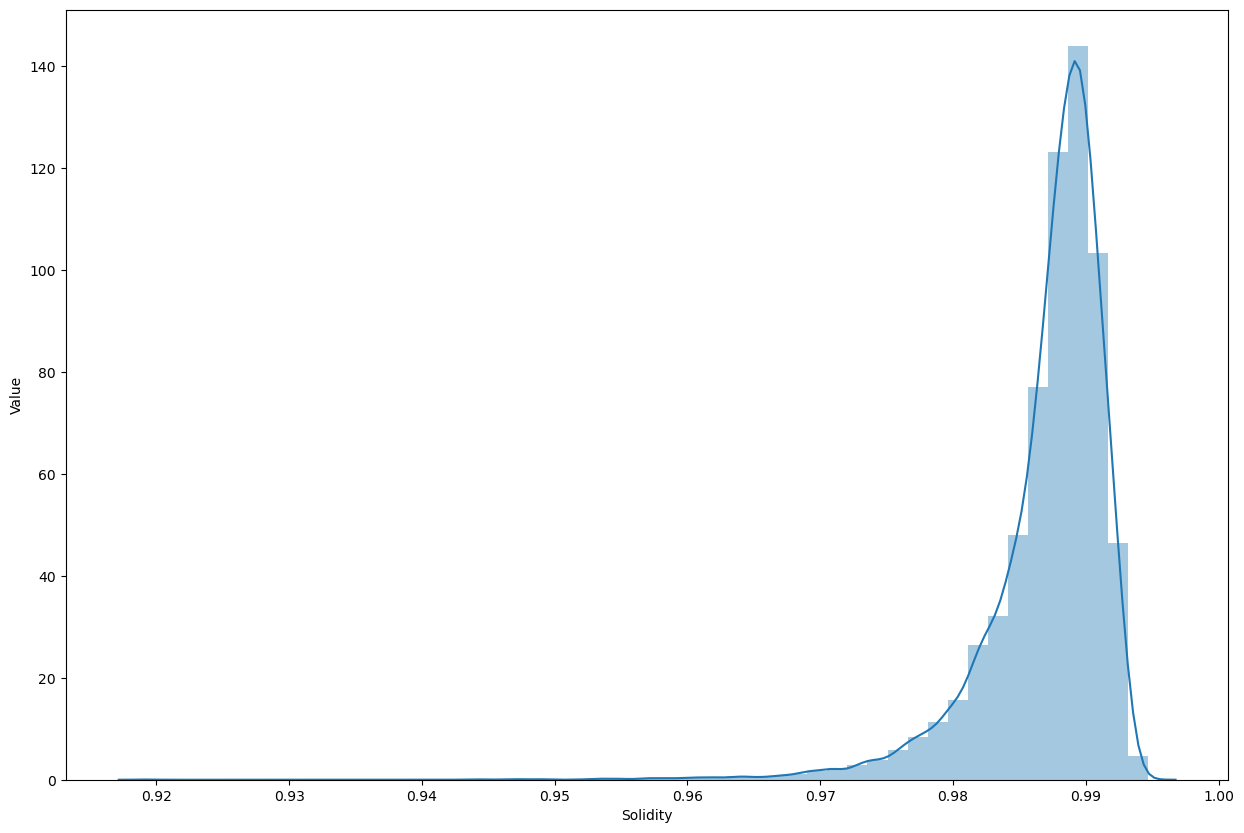

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


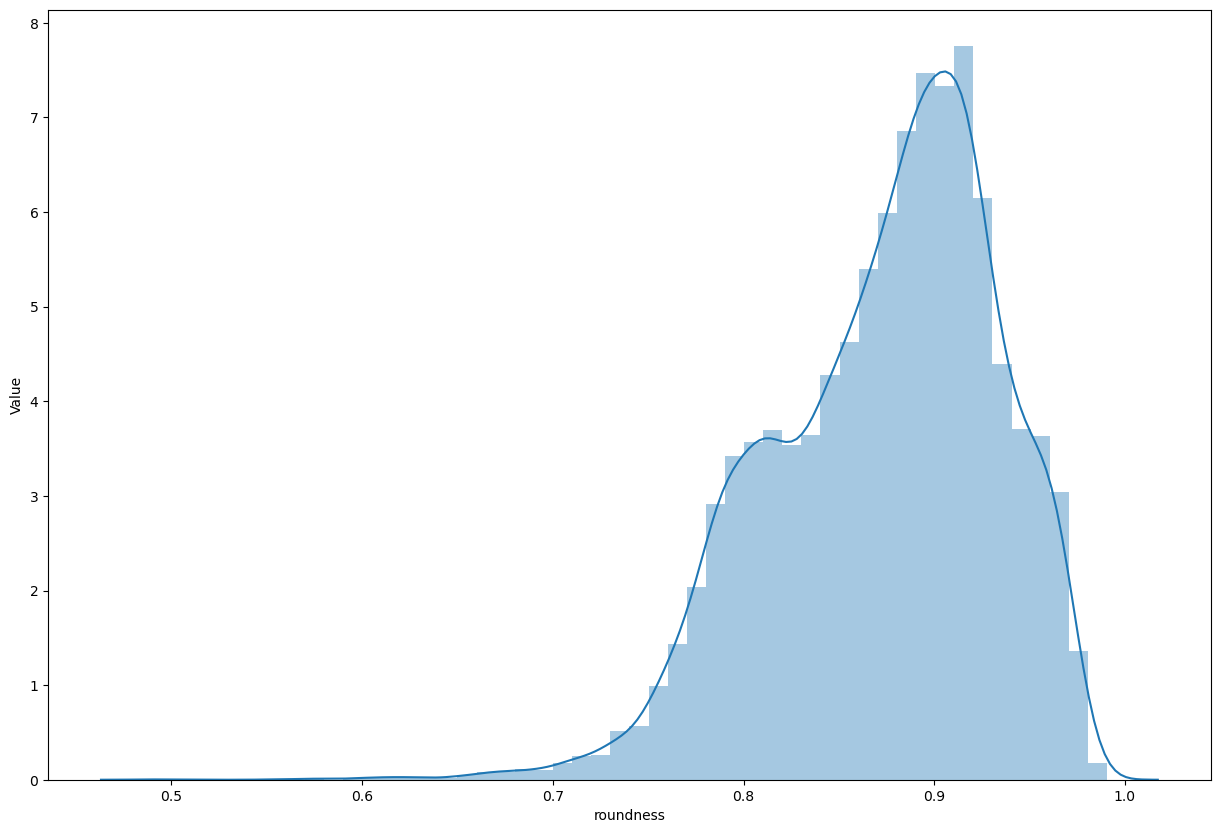

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


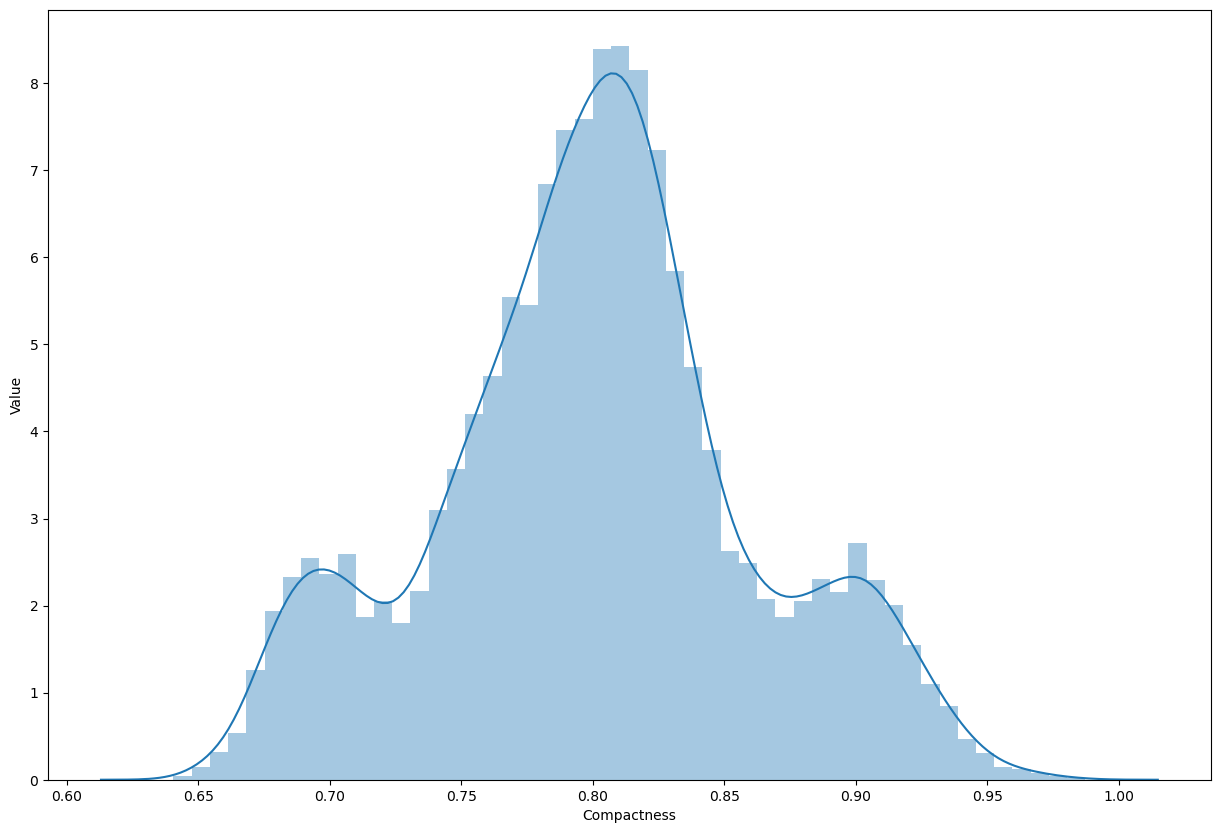

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


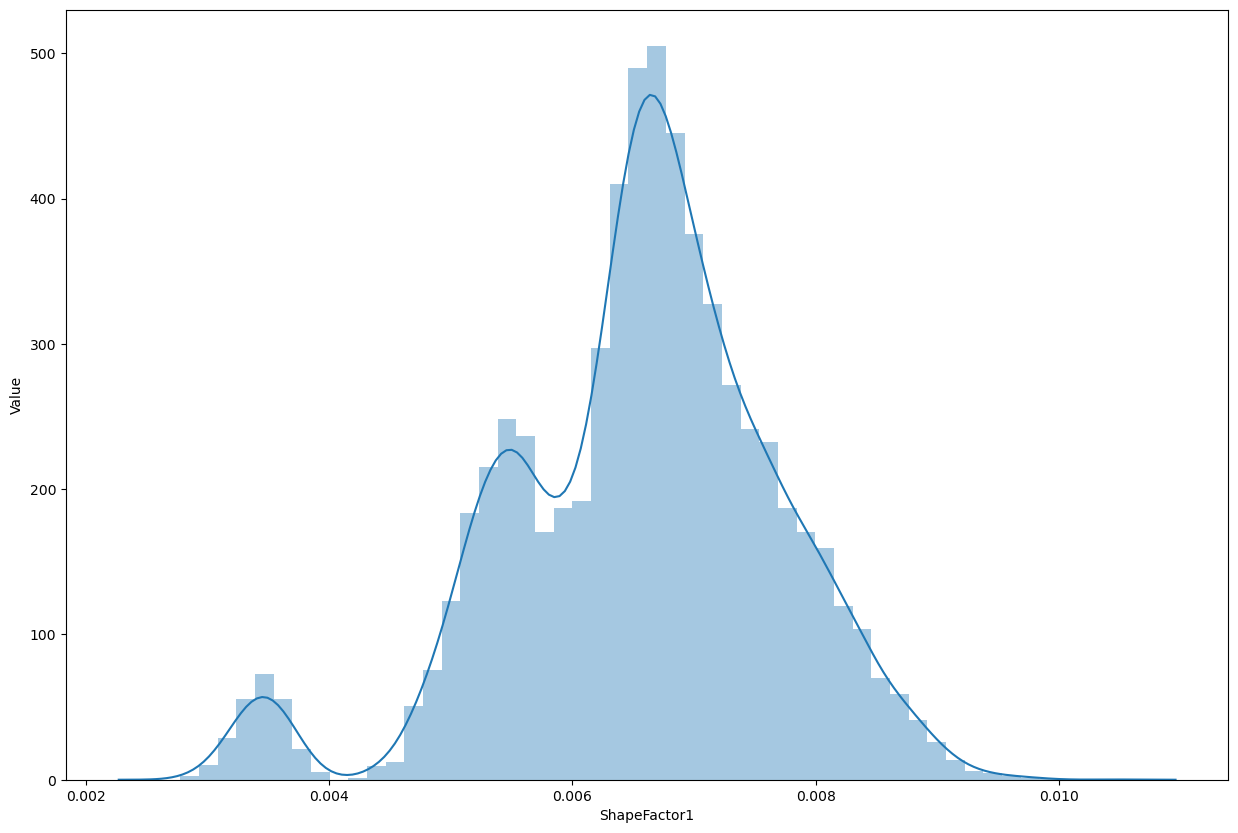

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


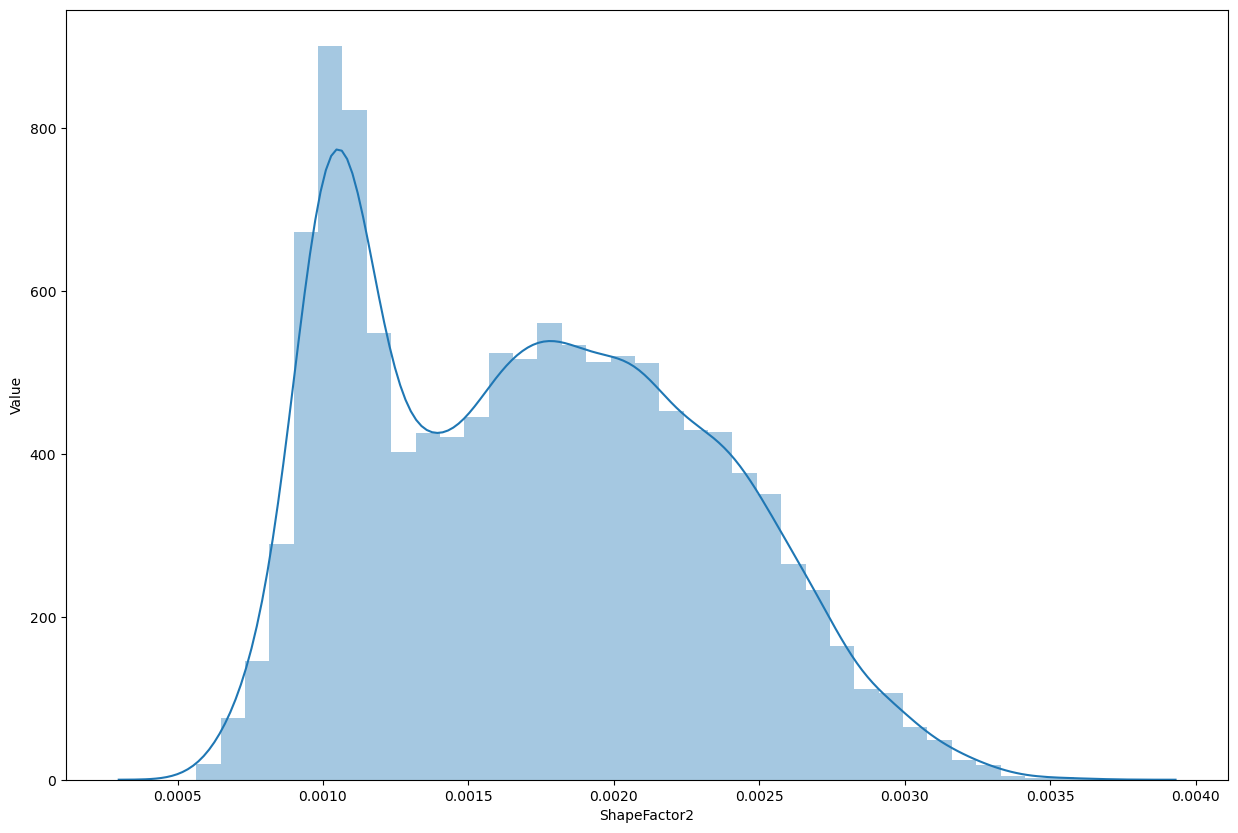

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


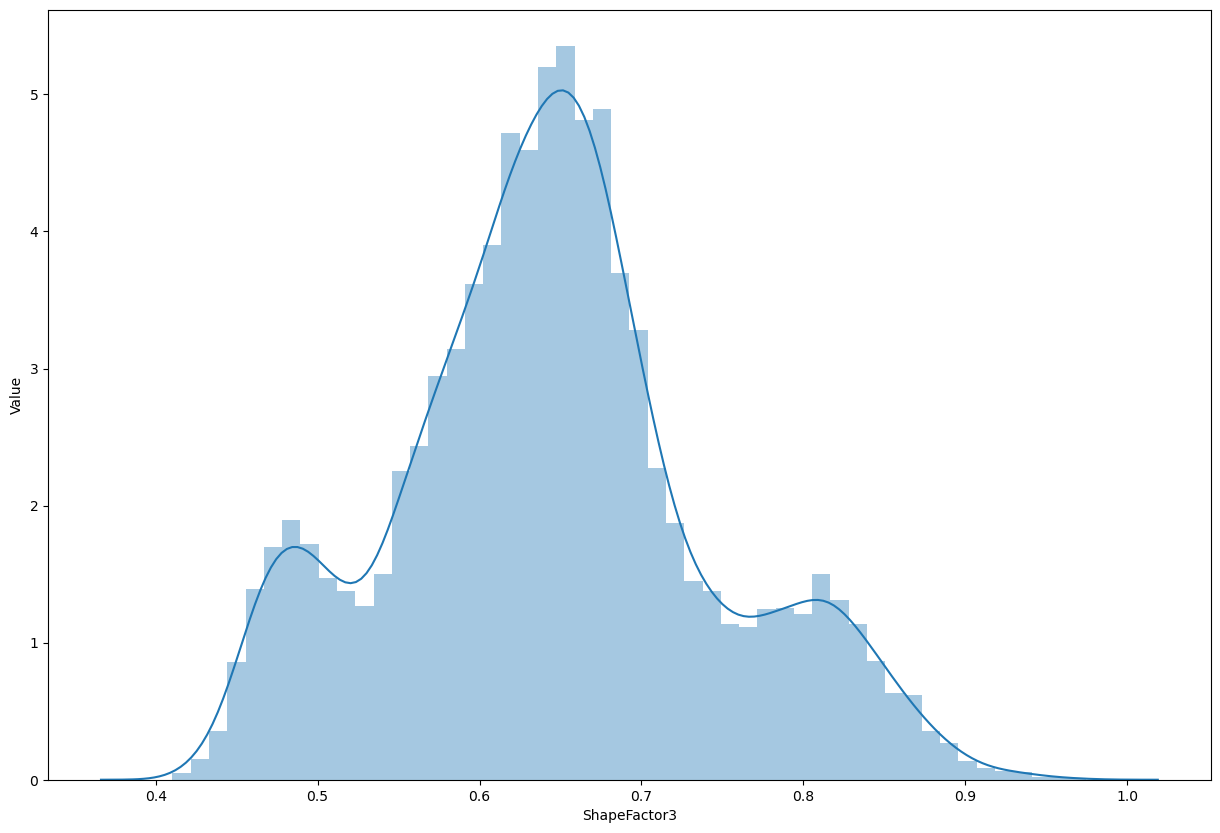

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


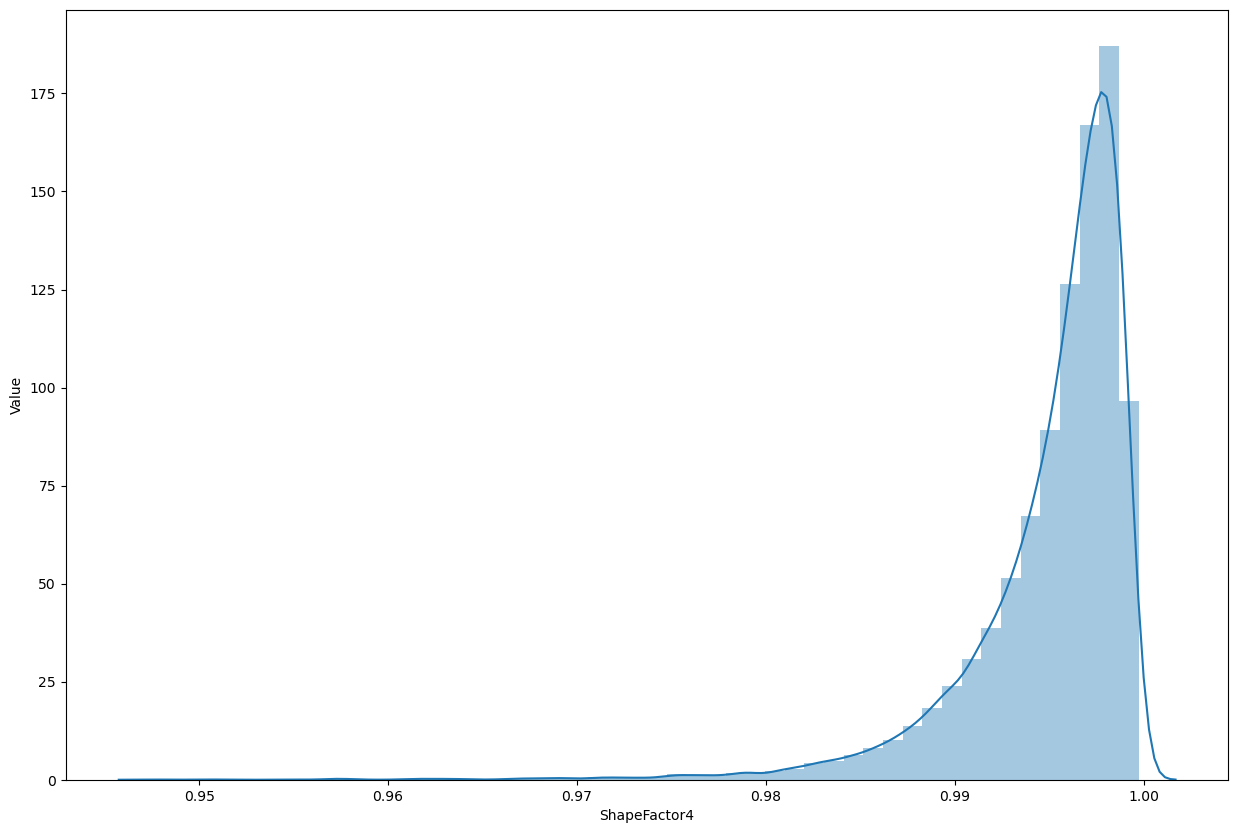

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


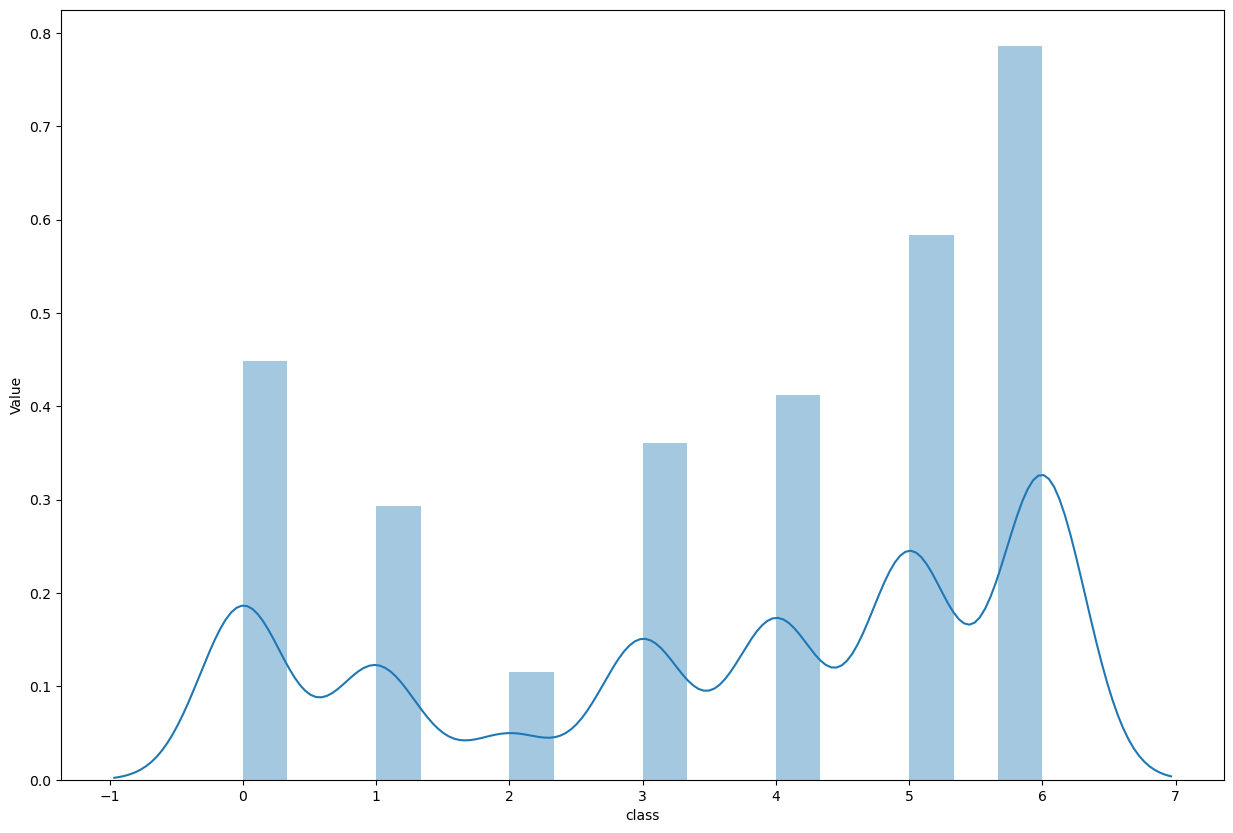

In [16]:
for i in df1.columns:
    plt.figure(figsize=(15,10))
    sns.distplot(df1[i])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.show()
    

## Outliar Detection 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


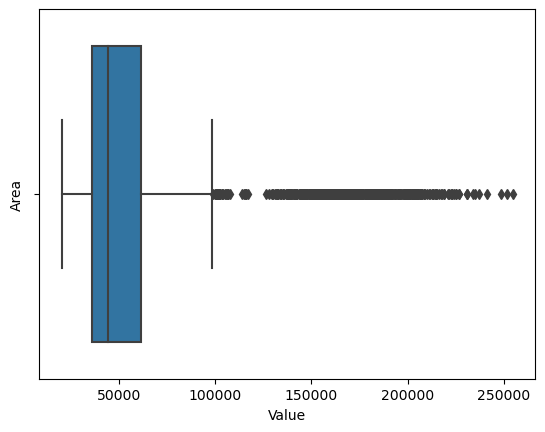

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


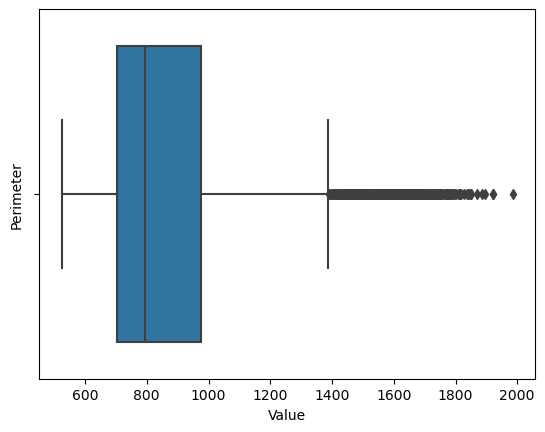

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


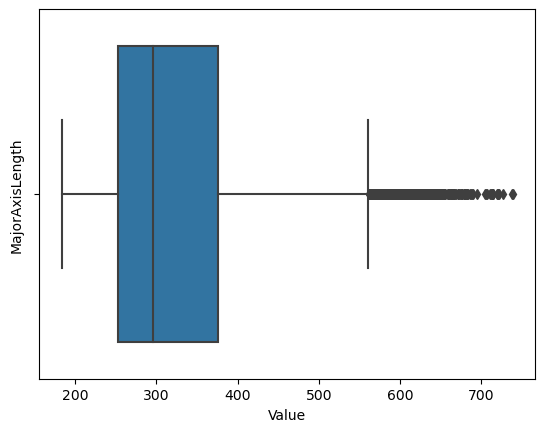

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


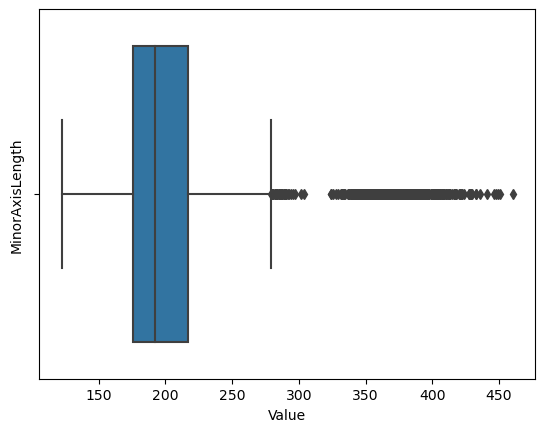

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


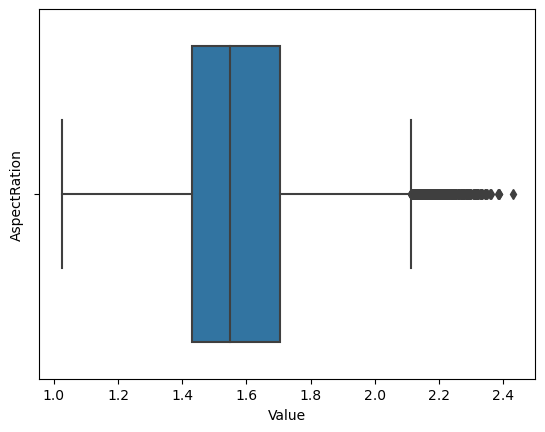

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


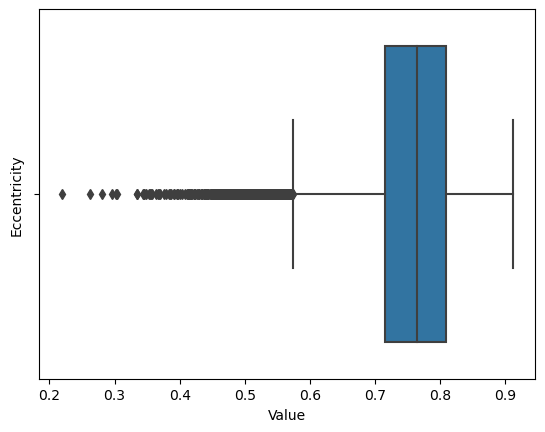

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


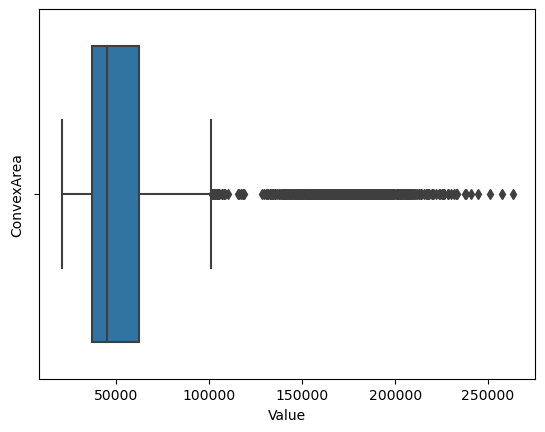

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


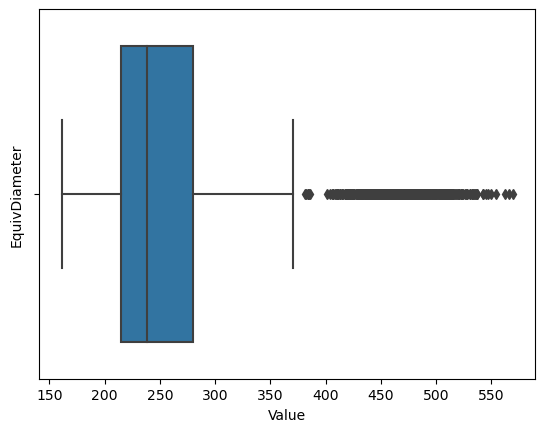

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


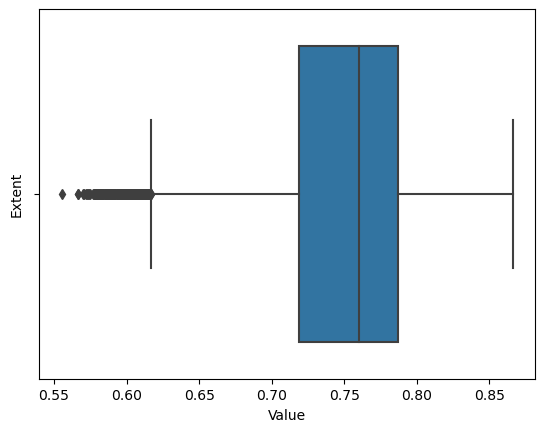

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


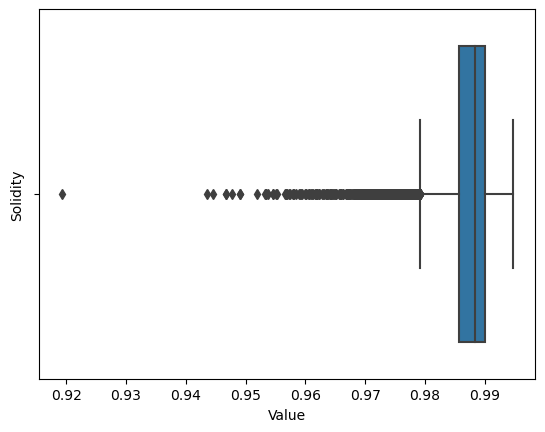

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


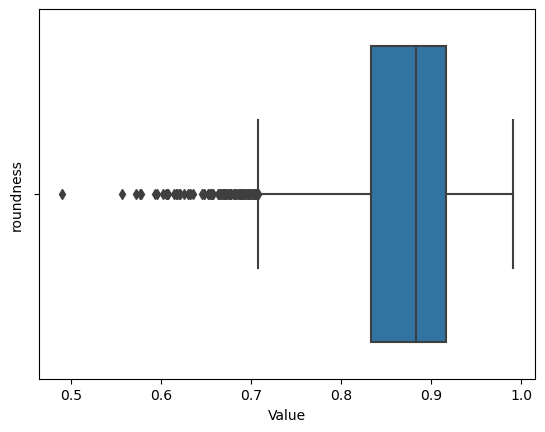

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


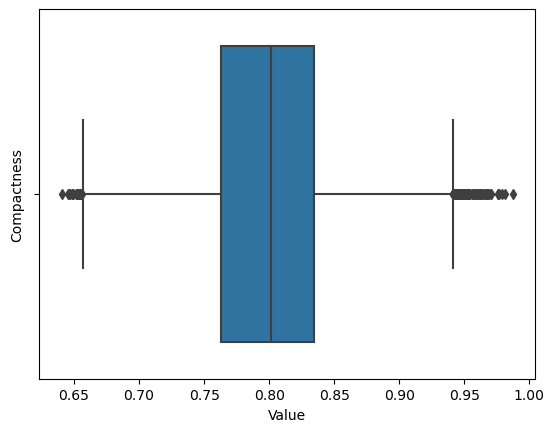

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


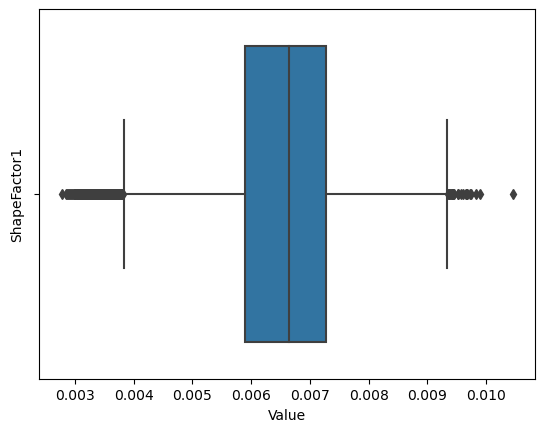

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


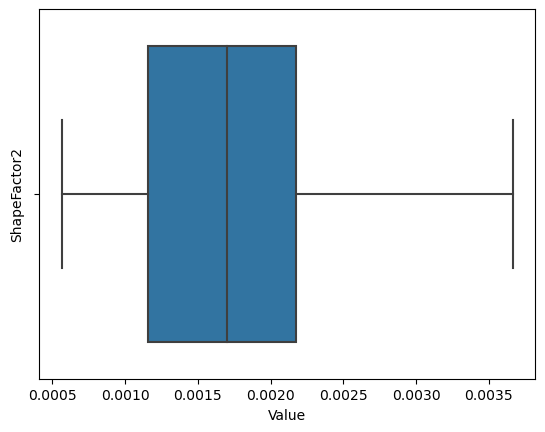

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


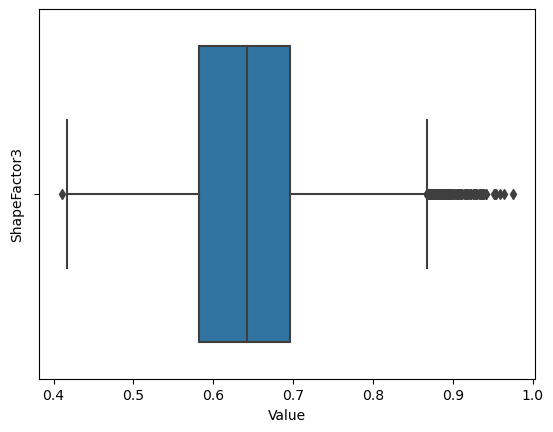

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


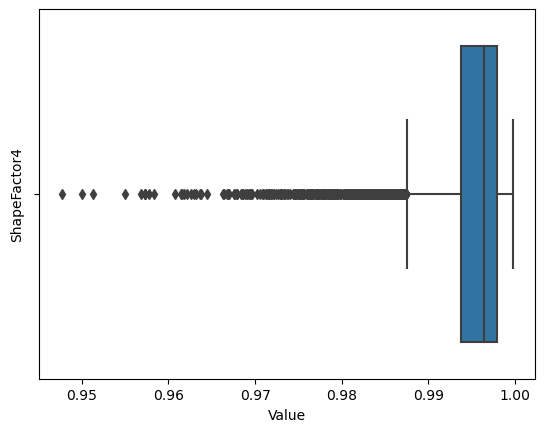

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


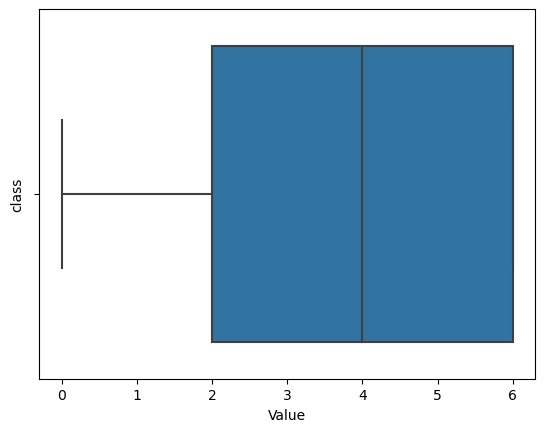

In [17]:
for x in df1.columns:
    sns.boxplot(df1[x])
    plt.xlabel('Value')
    plt.ylabel(x)
    plt.show()

## Dealing with outliars 

In [18]:
Q1=np.percentile(df1['ConvexArea'],25)
Q3=np.percentile(df1['ConvexArea'],75)
IQR=Q3-Q1
lf=Q1-(1.5*IQR)
uf=Q3+(1.5*IQR)


In [19]:
df=df1.copy()
df['ConvexArea']=np.where(df['ConvexArea']>uf,uf,
                         np.where(df['ConvexArea']<lf,lf,df['ConvexArea']))

In [20]:
Q1s4=np.percentile(df1['ShapeFactor4'],25)
Q3s4=np.percentile(df1['ShapeFactor4'],75)
IQRs4=Q3s4-Q1s4
lfs4=Q1s4-(1.5*IQRs4)
ufs4=Q3s4+(1.5*IQRs4)


In [21]:
df['ShapeFactor4']=np.where(df['ShapeFactor4']>ufs4,ufs4,
                           np.where(df['ShapeFactor4']<lfs4,lfs4,df['ShapeFactor4']))

In [22]:
Q1s3=np.percentile(df1['ShapeFactor3'],25)
Q3s3=np.percentile(df1['ShapeFactor3'],75)
IQRs3=Q3s3-Q1s3
lfs3=Q1s3-(1.5*IQRs3)
ufs3=Q3s3+(1.5*IQRs3)


In [23]:
df['ShapeFactor3']=np.where(df['ShapeFactor3']>ufs3,ufs3,
                           np.where(df['ShapeFactor3']<lfs3,lfs3,df['ShapeFactor3']))

In [24]:
Q1s1=np.percentile(df1['ShapeFactor1'],25)
Q3s1=np.percentile(df1['ShapeFactor1'],75)
IQRs1=Q3s1-Q1s1
lfs1=Q1s1-(1.5*IQRs1)
ufs1=Q3s1+(1.5*IQRs1)


In [25]:
df['ShapeFactor1']=np.where(df['ShapeFactor1']>ufs1,ufs1,
                           np.where(df['ShapeFactor1']<lfs1,lfs1,df['ShapeFactor1']))

In [26]:
Q1co=np.percentile(df1['Compactness'],25)
Q3co=np.percentile(df1['Compactness'],75)
IQRco=Q3co-Q1co
lfco=Q1co-(1.5*IQRco)
ufco=Q3co+(1.5*IQRco)


In [27]:
df['Compactness']=np.where(df['Compactness']>ufco,ufco,
                          np.where(df['Compactness']<lfco,lfco,df['Compactness']))

In [28]:
Q1ro=np.percentile(df1['roundness'],25)
Q3ro=np.percentile(df1['roundness'],75)
IQRro=Q3ro-Q1ro
lfro=Q1ro-(1.5*IQRro)
ufro=Q3ro+(1.5*IQRro)


In [29]:
df['roundness']=np.where(df['roundness']>ufro,ufro,
                          np.where(df['roundness']<lfro,lfro,df['roundness']))

In [30]:
Q1so=np.percentile(df1['Solidity'],25)
Q3so=np.percentile(df1['Solidity'],75)
IQRso=Q3so-Q1so
lfso=Q1so-(1.5*IQRso)
ufso=Q3so+(1.5*IQRso)


In [31]:
df['Solidity']=np.where(df['Solidity']>ufso,ufso,
                          np.where(df['Solidity']<lfso,lfso,df['Solidity']))

In [32]:
Q1ex=np.percentile(df1['Extent'],25)
Q3ex=np.percentile(df1['Extent'],75)
IQRex=Q3ex-Q1ex
lfex=Q1ex-(1.5*IQRex)
ufex=Q3ex+(1.5*IQRex)


In [33]:
df['Extent']=np.where(df['Extent']>ufex,ufex,
                          np.where(df['Extent']<lfex,lfex,df['Extent']))

In [34]:
Q1eq=np.percentile(df1['EquivDiameter'],25)
Q3eq=np.percentile(df1['EquivDiameter'],75)
IQReq=Q3eq-Q1eq
lfeq=Q1eq-(1.5*IQReq)
ufeq=Q3eq+(1.5*IQReq)


In [35]:
df['EquivDiameter']=np.where(df['EquivDiameter']>ufeq,ufeq,
                          np.where(df['EquivDiameter']<lfeq,lfeq,df['EquivDiameter']))

In [36]:
Q1ec=np.percentile(df1['Eccentricity'],25)
Q3ec=np.percentile(df1['Eccentricity'],75)
IQRec=Q3ec-Q1ec
lfec=Q1ec-(1.5*IQRec)
ufec=Q3ec+(1.5*IQRec)


In [37]:
df['Eccentricity']=np.where(df['Eccentricity']>ufec,ufec,
                          np.where(df['Eccentricity']<lfec,lfec,df['Eccentricity']))

In [38]:
Q1as=np.percentile(df1['AspectRation'],25)
Q3as=np.percentile(df1['AspectRation'],75)
IQRas=Q3as-Q1as
lfas=Q1as-(1.5*IQRas)
ufas=Q3as+(1.5*IQRas)


In [39]:
df['AspectRation']=np.where(df['AspectRation']>ufas,ufas,
                          np.where(df['AspectRation']<lfas,lfas,df['AspectRation']))

In [40]:
Q1mi=np.percentile(df1['MinorAxisLength'],25)
Q3mi=np.percentile(df1['MinorAxisLength'],75)
IQRmi=Q3mi-Q1mi
lfmi=Q1mi-(1.5*IQRmi)
ufmi=Q3mi+(1.5*IQRmi)


In [41]:
df['MinorAxisLength']=np.where(df['MinorAxisLength']>ufmi,ufmi,
                          np.where(df['MinorAxisLength']<lfmi,lfmi,df['MinorAxisLength']))

In [42]:
Q1ma=np.percentile(df1['MajorAxisLength'],25)
Q3ma=np.percentile(df1['MajorAxisLength'],75)
IQRma=Q3ma-Q1ma
lfma=Q1ma-(1.5*IQRma)
ufma=Q3ma+(1.5*IQRma)


In [43]:
df['MajorAxisLength']=np.where(df['MajorAxisLength']>ufma,ufma,
                          np.where(df['MajorAxisLength']<lfma,lfma,df['MajorAxisLength']))

In [44]:
Q1pe=np.percentile(df1['Perimeter'],25)
Q3pe=np.percentile(df1['Perimeter'],75)
IQRpe=Q3pe-Q1pe
lfpe=Q1pe-(1.5*IQRpe)
ufpe=Q3pe+(1.5*IQRpe)


In [45]:
df['Perimeter']=np.where(df['Perimeter']>ufpe,ufpe,
                          np.where(df['Perimeter']<lfpe,lfpe,df['Perimeter']))

In [46]:
Q1ar=np.percentile(df1['Area'],25)
Q3ar=np.percentile(df1['Area'],75)
IQRar=Q3ar-Q1ar
lfar=Q1ar-(1.5*IQRar)
ufar=Q3ar+(1.5*IQRar)


In [47]:
df['Area']=np.where(df['Area']>ufar,ufar,
                          np.where(df['Area']<lfar,lfar,df['Area']))

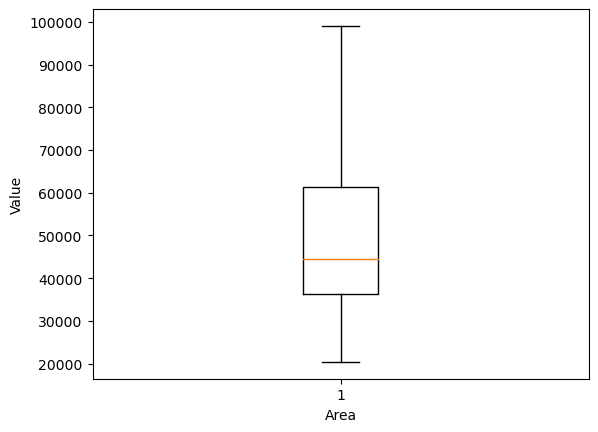

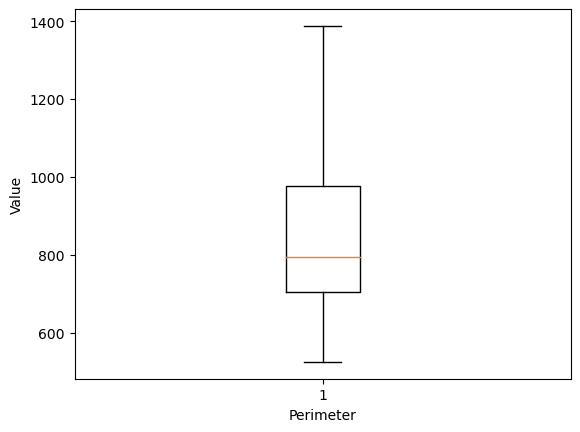

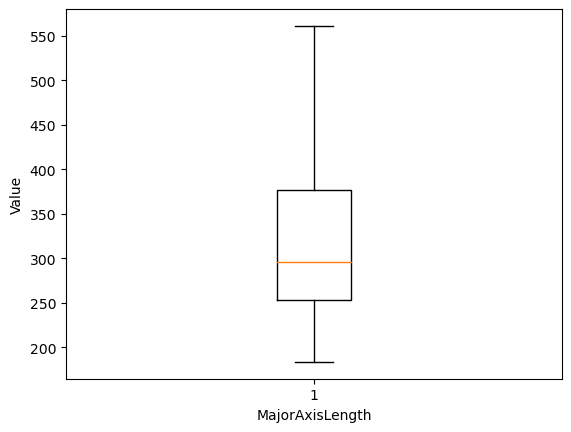

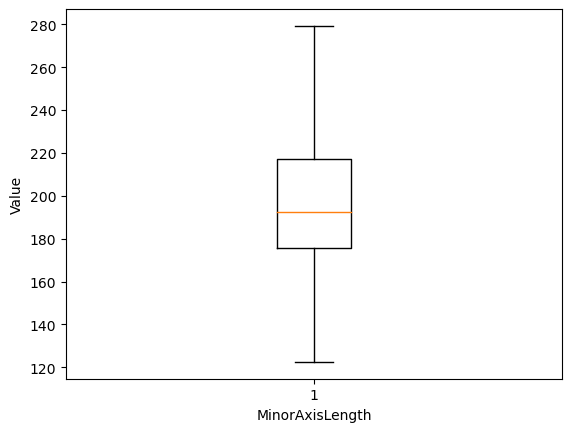

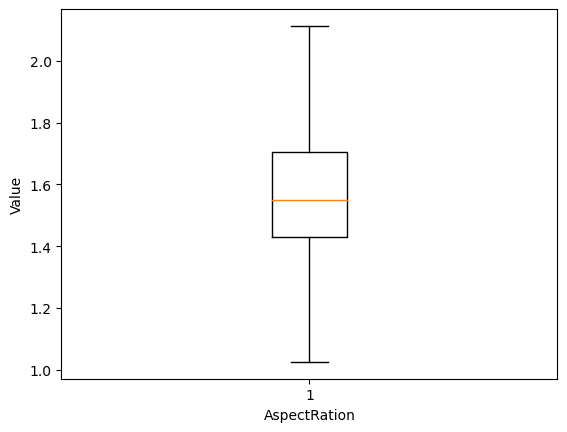

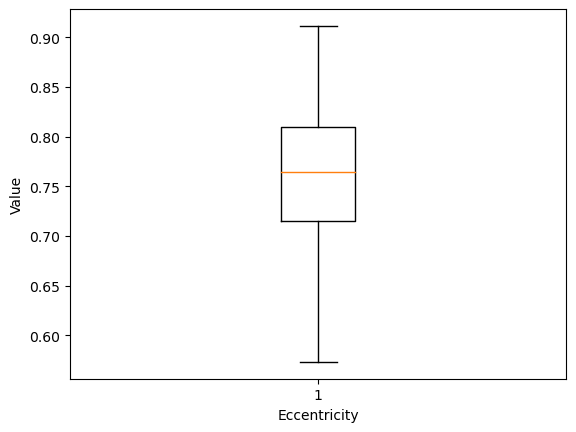

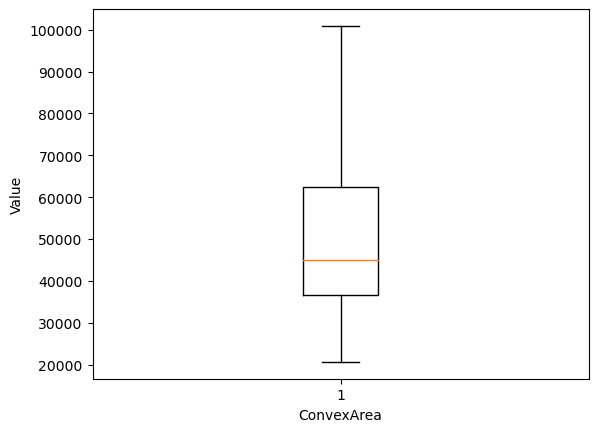

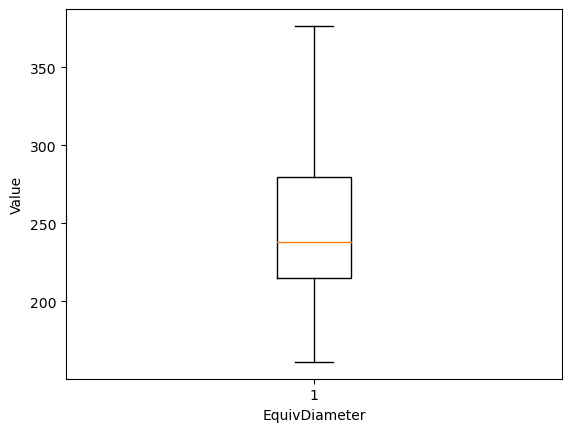

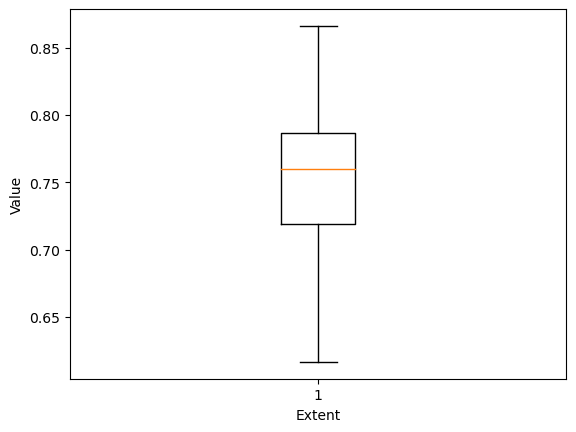

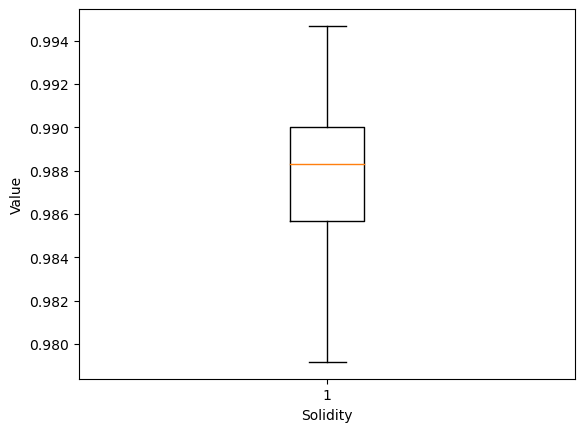

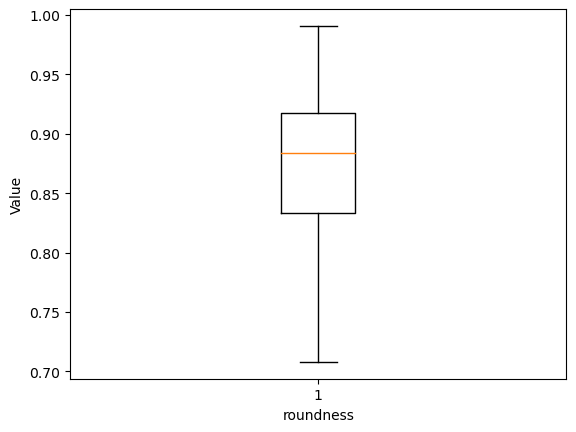

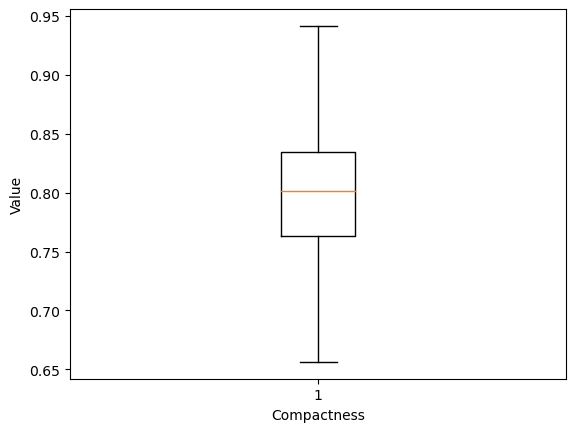

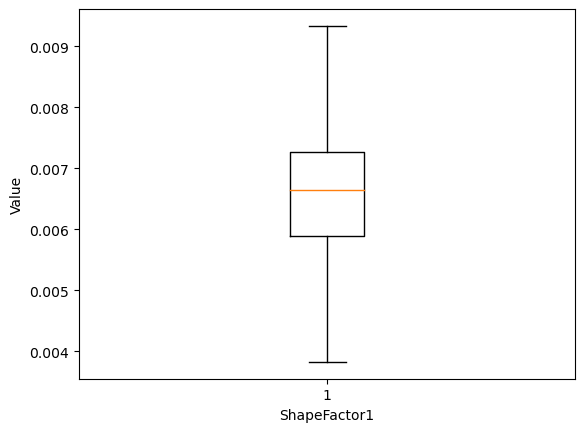

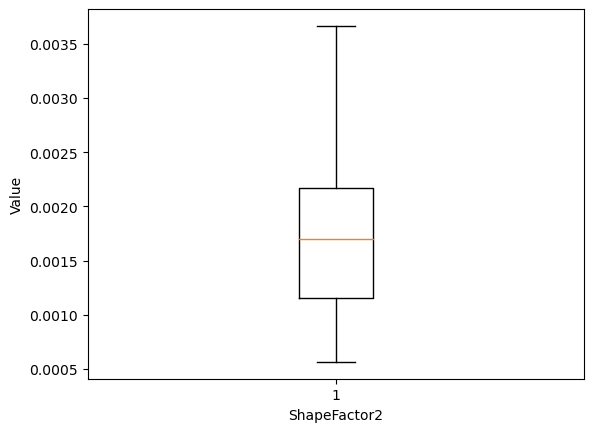

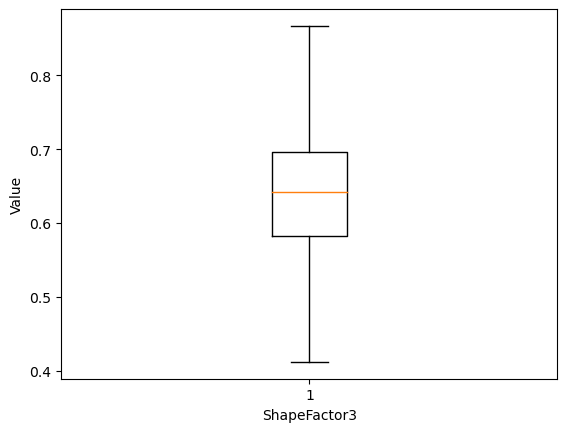

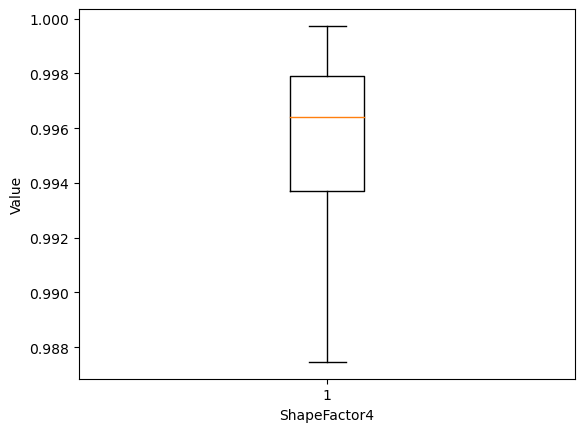

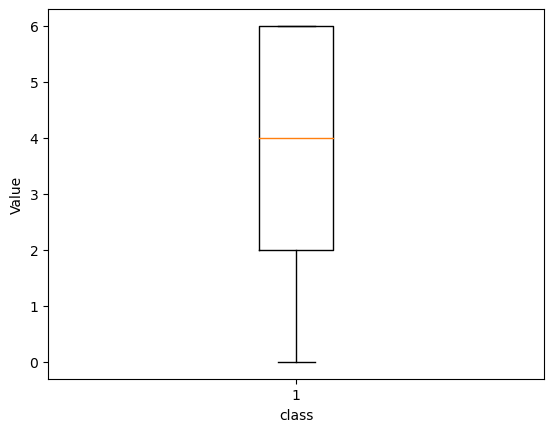

In [48]:
for e in df.columns:
    plt.boxplot(df[e])
    plt.xlabel(e)
    plt.ylabel('Value')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


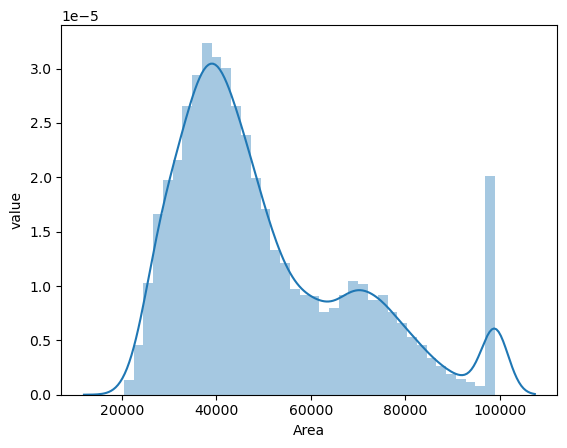

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


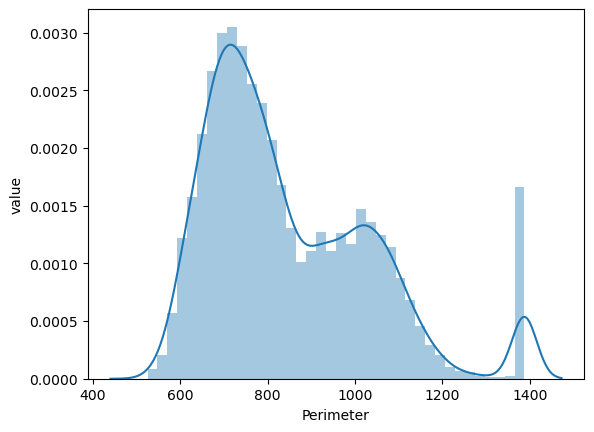

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


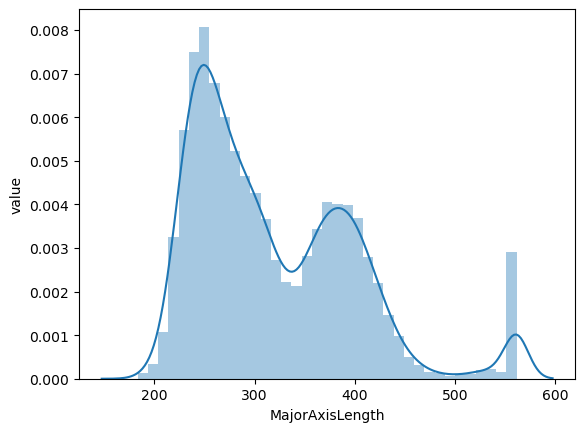

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


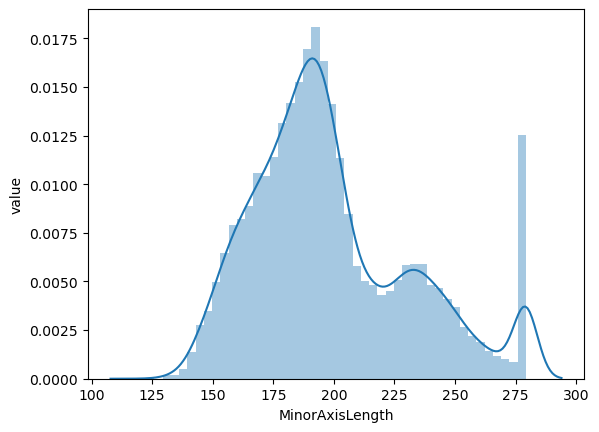

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


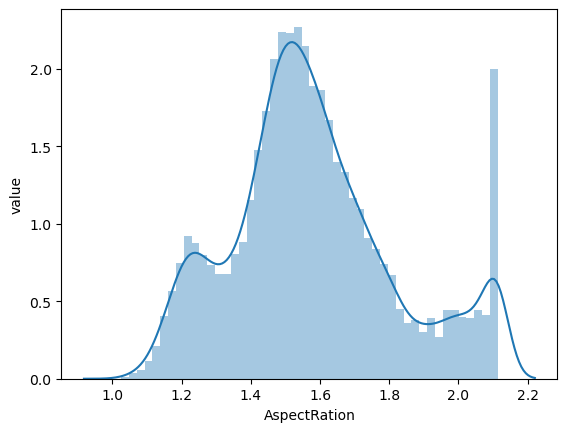

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


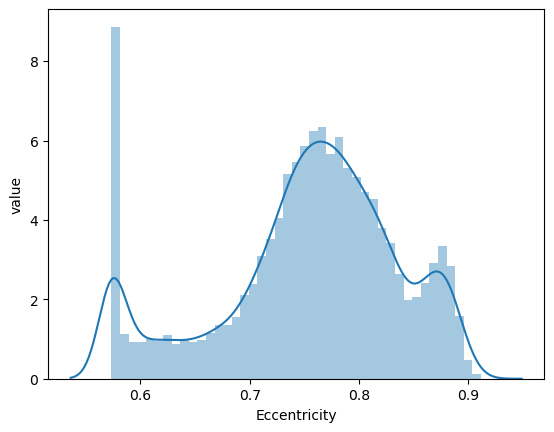

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


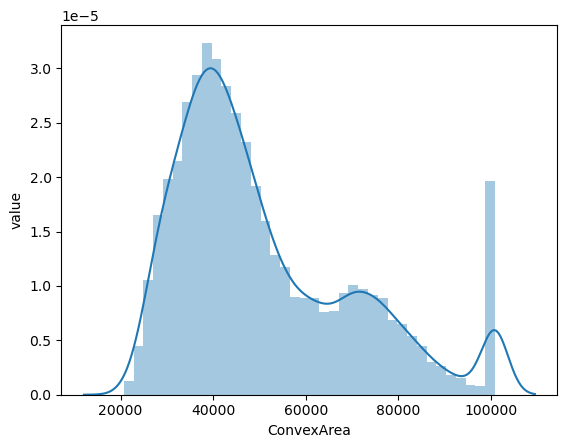

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


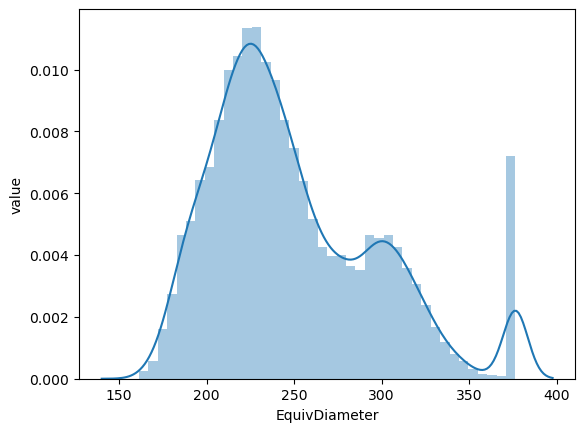

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


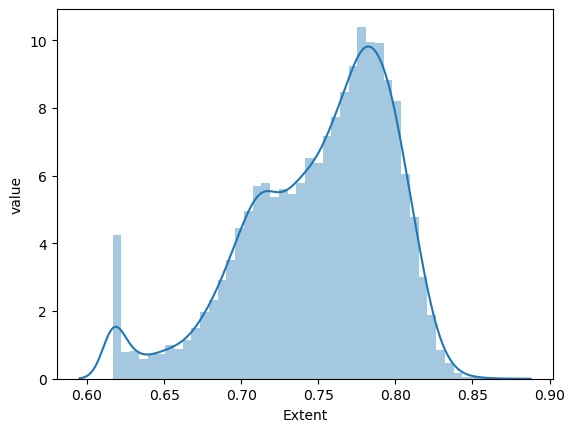

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


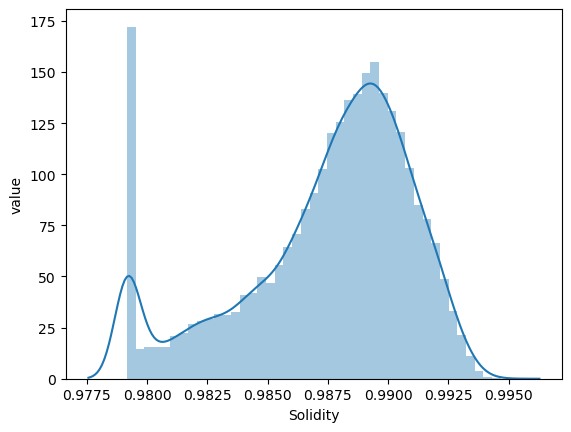

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


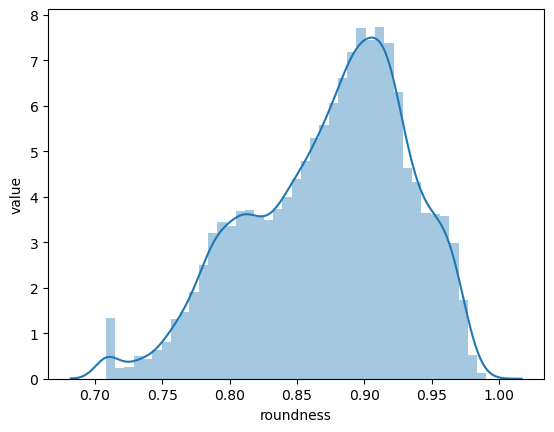

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


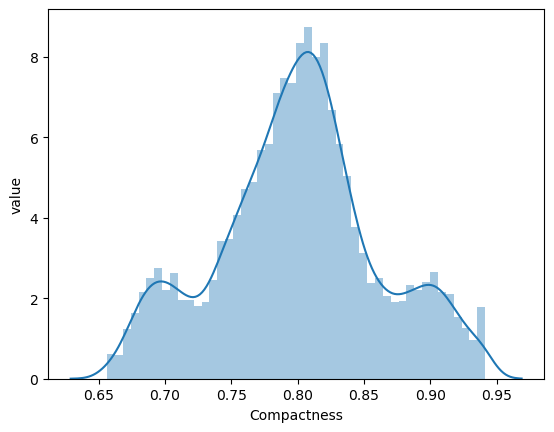

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


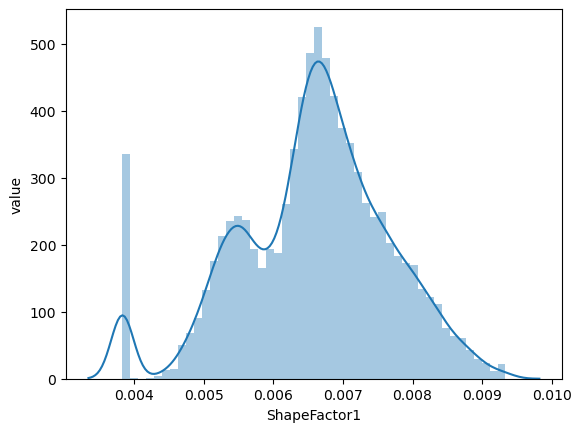

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


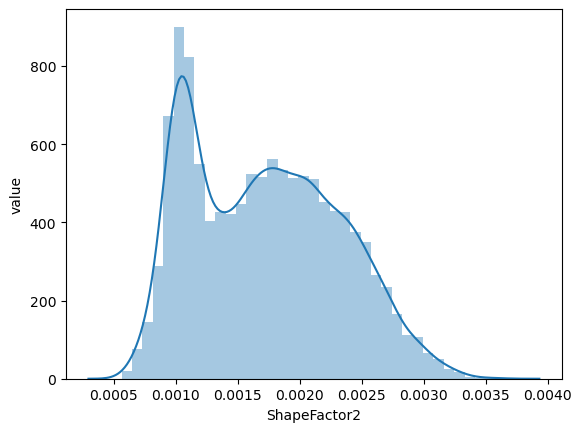

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


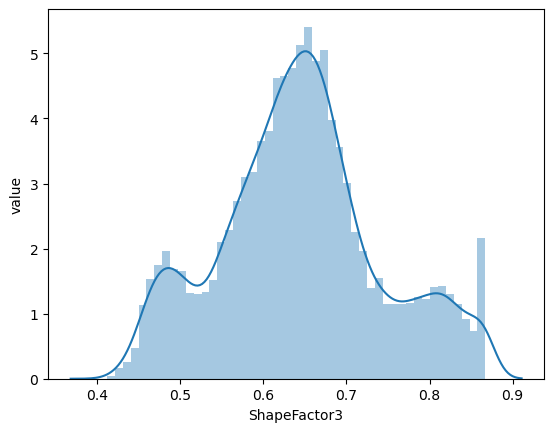

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


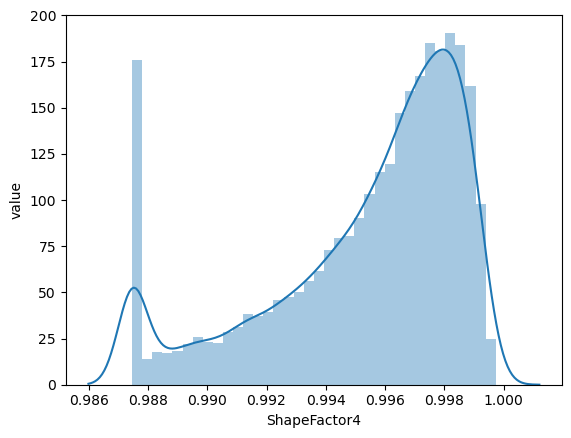

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


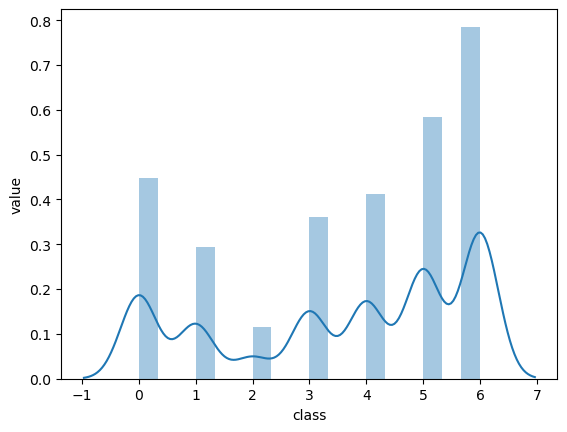

In [49]:
for t in df.columns:
    sns.distplot(df[t])
    plt.xlabel(t)
    plt.ylabel('value')
    plt.show()

## Train test split

In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV
X=df.drop(['class'],axis=1)
Y=df['class']

In [51]:
X.shape

(13543, 16)

In [52]:
Y.shape

(13543,)

In [53]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [54]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
X_res,Y_res=nm.fit_resample(X,Y)

In [55]:
X_res.shape,Y_res.shape

((3654, 16), (3654,))

In [56]:
from collections import Counter


In [57]:
print('The original {}'.format(Counter(Y)))
print('After resampelling {}'.format(Counter(Y_res)))

The original Counter({6: 3546, 5: 2636, 0: 2027, 4: 1860, 3: 1630, 1: 1322, 2: 522})
After resampelling Counter({0: 522, 1: 522, 2: 522, 3: 522, 4: 522, 5: 522, 6: 522})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

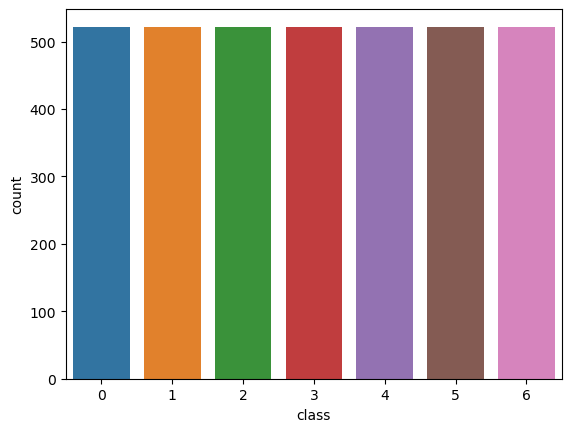

In [58]:
sns.countplot(Y_res)

In [59]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
X1=sts.fit_transform(X_res)

In [60]:
X1.shape

(3654, 16)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y_res,train_size=0.7,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2557, 16), (1097, 16), (2557,), (1097,))

# Logistic Regression

In [62]:
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,accuracy_score,auc,roc_auc_score

In [63]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pre=log.predict(x_test)

In [65]:
y_pre

array([5, 4, 1, ..., 1, 5, 5], dtype=int64)

In [66]:
log.score(x_test,y_test)

0.9726526891522334

In [67]:
log.score(x_train,y_train)

0.9780993351583888

In [68]:
con1=confusion_matrix(y_test,y_pre)
con1

array([[147,   0,   0,   0,   0,   6,   4],
       [  0, 166,   0,   2,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0],
       [  0,   5,   0, 150,   0,   0,   0],
       [  0,   2,   0,   0, 139,   2,   0],
       [  3,   0,   0,   0,   6, 147,   0],
       [  0,   0,   0,   0,   0,   0, 159]], dtype=int64)

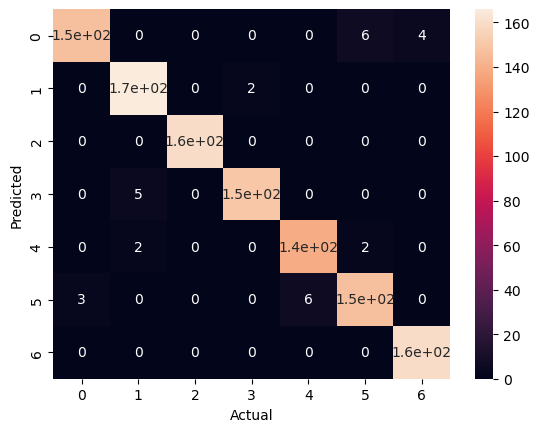

In [69]:
sns.heatmap(con1,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [70]:
acc1=accuracy_score(y_test,y_pre)
print('The accuracy score is = '+str(acc1))

The accuracy score is = 0.9726526891522334


In [71]:
calL=classification_report(y_test,y_pre)
print(calL)


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       157
           1       0.96      0.99      0.97       168
           2       1.00      1.00      1.00       159
           3       0.99      0.97      0.98       155
           4       0.96      0.97      0.97       143
           5       0.95      0.94      0.95       156
           6       0.98      1.00      0.99       159

    accuracy                           0.97      1097
   macro avg       0.97      0.97      0.97      1097
weighted avg       0.97      0.97      0.97      1097



In [72]:
L_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
L_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong predictions are

In [73]:
A=len(L_df.loc[L_df['Actual']!=L_df['Predicted']])
A

30

# Decision Tree
## Without Gridsearch cv

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pre_dt=dt.predict(x_test)

In [75]:
y_pre_dt

array([5, 4, 1, ..., 1, 5, 5], dtype=int64)

In [76]:
dt.score(x_test,y_test)

0.9644484958979034

In [77]:
dt.score(x_train,y_train)

1.0

## Grid search cv 

In [78]:
grid_pram = {'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':range(2,5,1),
            'min_samples_split':range(2,5,1),
            'min_samples_leaf':range(1,5,1),
            'ccp_alpha':np.random.rand(20)}           

In [113]:
G_cv=GridSearchCV(estimator=dt, param_grid=grid_pram,n_jobs=1,cv=10)
G_cv.fit(x_train,y_train)
G_cv.best_params_

{'ccp_alpha': 0.13584889941062173,
 'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [78]:
dt1=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=4,min_samples_split=2,min_samples_leaf=1,ccp_alpha=0.13584889941062173)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.13584889941062173, criterion='entropy',
                       max_depth=4)

In [79]:
y_pre_dt1=dt1.predict(x_test)
y_pre_dt1

array([5, 4, 1, ..., 1, 5, 5], dtype=int64)

In [80]:
dt1.score(x_test,y_test)

0.9416590701914311

In [81]:
dt1.score(x_train,y_train)

0.9569808369182636

## Performing Matrix 

In [82]:
con2=confusion_matrix(y_test,y_pre_dt1)
con2

array([[148,   1,   0,   0,   0,   8,   0],
       [  0, 137,   0,  31,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0],
       [  0,  17,   0, 138,   0,   0,   0],
       [  0,   1,   0,   1, 140,   1,   0],
       [  2,   0,   0,   0,   2, 152,   0],
       [  0,   0,   0,   0,   0,   0, 159]], dtype=int64)

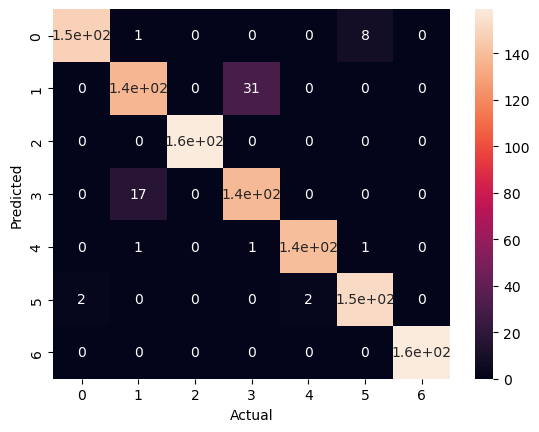

In [83]:
sns.heatmap(con2,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [84]:
acc2=accuracy_score(y_test,y_pre_dt1)
print('The accuracy score is = '+str(acc2))

The accuracy score is = 0.9416590701914311


In [85]:
cal2=classification_report(y_test,y_pre_dt1)
print(cal2)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       157
           1       0.88      0.82      0.85       168
           2       1.00      1.00      1.00       159
           3       0.81      0.89      0.85       155
           4       0.99      0.98      0.98       143
           5       0.94      0.97      0.96       156
           6       1.00      1.00      1.00       159

    accuracy                           0.94      1097
   macro avg       0.94      0.94      0.94      1097
weighted avg       0.94      0.94      0.94      1097



In [86]:
Dt_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_dt1})
Dt_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong predictions are 

In [87]:
B=len(Dt_df.loc[Dt_df['Actual']!=Dt_df['Predicted']])
B

64

# SVM
## RBF

In [88]:
from sklearn.svm import SVC
svc1=SVC(gamma='auto')
svc1.fit(x_train,y_train)

SVC(gamma='auto')

In [89]:
y_pre_s1=svc1.predict(x_test)

In [90]:
svc1.score(x_test,y_test)

0.9790337283500455

In [91]:
svc1.score(x_train,y_train)

0.9839655846695347

In [92]:
accr=accuracy_score(y_test,y_pre_s1)
accr

0.9790337283500455

In [93]:
calr=classification_report(y_test,y_pre_s1)
print(calr)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       157
           1       0.97      0.99      0.98       168
           2       1.00      1.00      1.00       159
           3       0.99      0.97      0.98       155
           4       0.99      0.99      0.99       143
           5       0.96      0.97      0.96       156
           6       0.98      1.00      0.99       159

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [94]:
rbf_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_s1})
rbf_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong predictions are

In [95]:
C=len(rbf_df.loc[rbf_df['Actual']!=rbf_df['Predicted']])
C

23

## Linear 

In [96]:
svc2=SVC(kernel='linear')
svc2.fit(x_train,y_train)

SVC(kernel='linear')

In [97]:
y_pre_s2=svc2.predict(x_test)

In [98]:
svc2.score(x_test,y_test)

0.9799453053783045

In [99]:
svc2.score(x_train,y_train)

0.9851388345717638

In [100]:
accl=accuracy_score(y_test,y_pre_s2)
accl

0.9799453053783045

In [101]:
call=classification_report(y_test,y_pre_s2)
print(call)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       157
           1       0.95      0.99      0.97       168
           2       1.00      1.00      1.00       159
           3       0.99      0.97      0.98       155
           4       0.99      0.97      0.98       143
           5       0.95      0.97      0.96       156
           6       1.00      1.00      1.00       159

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [102]:
lin_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_s2})
lin_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong predictions are 

In [103]:
D=len(lin_df.loc[lin_df['Actual']!=lin_df['Predicted']])
D

22

## Poly

In [104]:
svc3=SVC(kernel='poly',degree=1)
svc3.fit(x_train,y_train)

SVC(degree=1, kernel='poly')

In [105]:
y_pre_s3=svc3.predict(x_test)

In [106]:
svc3.score(x_test,y_test)

0.9762989972652689

In [107]:
svc3.score(x_train,y_train)

0.979663668361361

In [108]:
accp=accuracy_score(y_test,y_pre_s3)
accp

0.9762989972652689

In [109]:
calp=classification_report(y_test,y_pre_s3)
print(calp)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       157
           1       0.96      0.98      0.97       168
           2       0.99      1.00      1.00       159
           3       0.98      0.97      0.97       155
           4       0.99      0.98      0.98       143
           5       0.94      0.97      0.96       156
           6       0.99      1.00      0.99       159

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [110]:
pol_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_s3})
pol_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong predictions are 

In [111]:
E=len(pol_df.loc[pol_df['Actual']!=pol_df['Predicted']])
E

26

## Sigmoid 

In [112]:
svc4=SVC(kernel='sigmoid')
svc4.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [113]:
y_pre_s4=svc4.predict(x_test)

In [114]:
svc4.score(x_test,y_test)

0.8851412944393802

In [115]:
svc4.score(x_train,y_train)

0.8908877590926867

In [116]:
accs=accuracy_score(y_test,y_pre_s4)
accs

0.8851412944393802

In [117]:
cals=classification_report(y_test,y_pre_s4)
print(cals)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       157
           1       0.96      0.95      0.95       168
           2       0.85      0.75      0.80       159
           3       0.76      0.87      0.81       155
           4       0.95      0.99      0.97       143
           5       0.92      0.85      0.88       156
           6       0.99      0.87      0.93       159

    accuracy                           0.89      1097
   macro avg       0.89      0.89      0.89      1097
weighted avg       0.89      0.89      0.89      1097



In [118]:
sig_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_s4})
sig_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,3
778,1,1
984,1,1
3062,5,5


## Number of wrong predictions are 

In [119]:
F=len(sig_df.loc[sig_df['Actual']!=sig_df['Predicted']])
F

126

# Random forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier( random_state=0)
ran.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [121]:
y_pre_ran=ran.predict(x_test)

In [122]:
ran.score(x_test,y_test)

0.9872379216043756

In [123]:
ran.score(x_train,y_train)

1.0

## Performing Matrix

In [124]:
con4=confusion_matrix(y_test,y_pre_ran)
con4

array([[153,   0,   0,   0,   0,   4,   0],
       [  0, 166,   0,   2,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0],
       [  0,   2,   0, 153,   0,   0,   0],
       [  0,   2,   0,   0, 141,   0,   0],
       [  3,   0,   0,   0,   1, 152,   0],
       [  0,   0,   0,   0,   0,   0, 159]], dtype=int64)

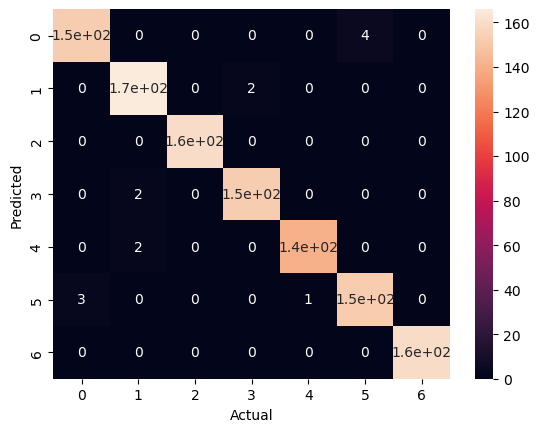

In [125]:
sns.heatmap(con4,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [126]:
acc4=accuracy_score(y_test,y_pre_ran)
print('The accuracy score is = '+str(acc4))

The accuracy score is = 0.9872379216043756


In [127]:
cal=classification_report(y_test,y_pre_ran)
print(cal)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       157
           1       0.98      0.99      0.98       168
           2       1.00      1.00      1.00       159
           3       0.99      0.99      0.99       155
           4       0.99      0.99      0.99       143
           5       0.97      0.97      0.97       156
           6       1.00      1.00      1.00       159

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



In [128]:
ran_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_ran})
ran_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong Predictions are 

In [129]:
G=len(ran_df.loc[ran_df['Actual']!=ran_df['Predicted']])
G

14

# KNN 

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [131]:
y_pre_knn=knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [132]:
knn.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9717411121239745

In [133]:
knn.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9769260852561595

## Performing Matrix 

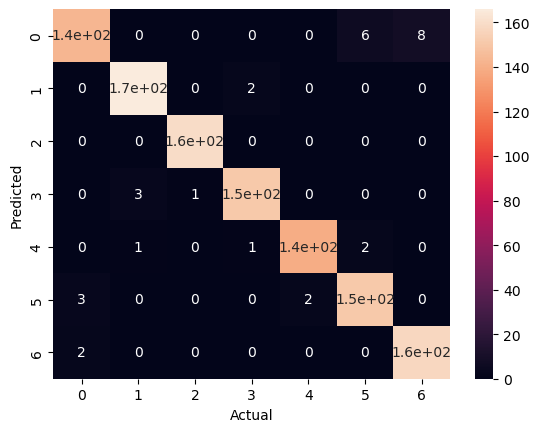

In [134]:
con5=confusion_matrix(y_test,y_pre_knn)
sns.heatmap(con5,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [135]:
acc5=accuracy_score(y_test,y_pre_knn)
print('The accuracy score is = '+str(acc5))

The accuracy score is = 0.9717411121239745


In [136]:
knn_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_knn})
knn_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


##  Number of wrong Predictions are

In [137]:
H=len(knn_df.loc[knn_df['Actual']!=knn_df['Predicted']])
H

31

# Naive bayes

In [138]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [139]:
y_pre_nb=nb.predict(x_test)

In [140]:
nb.score(x_test,y_test)

0.9608021877848678

In [141]:
nb.score(x_train,y_train)

0.9628470864294094

## Performing matrix

In [142]:
con6=confusion_matrix(y_test,y_pre_nb)
con6

array([[148,   0,   0,   0,   0,   8,   1],
       [  0, 156,   0,  12,   0,   0,   0],
       [  0,   2, 154,   3,   0,   0,   0],
       [  0,   6,   0, 149,   0,   0,   0],
       [  0,   1,   0,   0, 142,   0,   0],
       [  3,   0,   0,   0,   4, 149,   0],
       [  3,   0,   0,   0,   0,   0, 156]], dtype=int64)

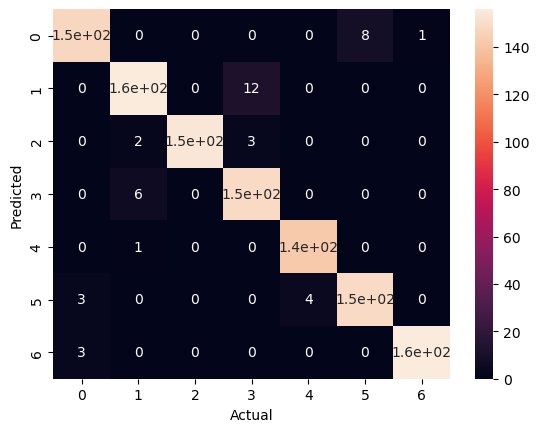

In [143]:
sns.heatmap(con6,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [144]:
acc6=accuracy_score(y_test,y_pre_nb)
print('The accuracy score is = '+str(acc6))

The accuracy score is = 0.9608021877848678


In [145]:
cal6=classification_report(y_test,y_pre_nb)
print(cal6)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       157
           1       0.95      0.93      0.94       168
           2       1.00      0.97      0.98       159
           3       0.91      0.96      0.93       155
           4       0.97      0.99      0.98       143
           5       0.95      0.96      0.95       156
           6       0.99      0.98      0.99       159

    accuracy                           0.96      1097
   macro avg       0.96      0.96      0.96      1097
weighted avg       0.96      0.96      0.96      1097



In [146]:
nb_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_nb})
nb_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


In [147]:
I=len(nb_df.loc[nb_df['Actual']!=nb_df['Predicted']])
I

43

# Ensemble Technic

# Voting Classifier

In [148]:
ran1=RandomForestClassifier(criterion='entropy')
ran2=RandomForestClassifier(n_estimators=200)
ran3=RandomForestClassifier(n_estimators=300)
ran4=RandomForestClassifier(n_estimators=400)

In [149]:
es=[('lin',svc2),('rbf',svc1),('rf',ran)]
es2=[('rf',ran),('rf1',ran1),('rf2',ran2),('rf3',ran3),('rf4',ran4)]

In [150]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=es2)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('rf1',
                              RandomForestClassifier(criterion='entropy')),
                             ('rf2', RandomForestClassifier(n_estimators=200)),
                             ('rf3', RandomForestClassifier(n_estimators=300)),
                             ('rf4', RandomForestClassifier(n_estimators=400))])

In [151]:
y_pre_v=vc.predict(x_test)

In [152]:
vc.score(x_test,y_test)

0.9845031905195989

In [153]:
vc.score(x_train,y_train)

1.0

## Performing Matrix

In [154]:
con7=confusion_matrix(y_test,y_pre_v)
con7

array([[153,   0,   0,   0,   0,   4,   0],
       [  0, 165,   0,   3,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0],
       [  0,   3,   0, 152,   0,   0,   0],
       [  0,   2,   0,   0, 141,   0,   0],
       [  4,   0,   0,   0,   1, 151,   0],
       [  0,   0,   0,   0,   0,   0, 159]], dtype=int64)

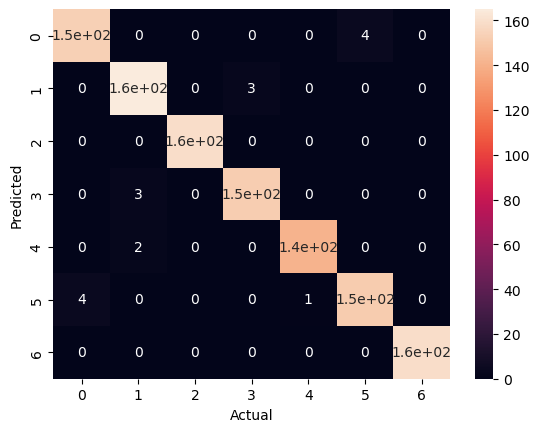

In [155]:
sns.heatmap(con7,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [156]:
acc7=accuracy_score(y_test,y_pre_v)
print('The accuracy score is = '+str(acc7))

The accuracy score is = 0.9845031905195989


In [157]:
cal7=classification_report(y_test,y_pre_v)
print(cal7)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.97      0.98      0.98       168
           2       1.00      1.00      1.00       159
           3       0.98      0.98      0.98       155
           4       0.99      0.99      0.99       143
           5       0.97      0.97      0.97       156
           6       1.00      1.00      1.00       159

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [158]:
vc_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_v})
vc_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong Predictions are

In [159]:
J=len(vc_df.loc[vc_df['Actual']!=vc_df['Predicted']])
J

17

# Bagging

In [160]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=ran,n_estimators=50)
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=0),
                  n_estimators=50)

In [161]:
y_pre_bag=bag.predict(x_test)

In [162]:
bag.score(x_test,y_test)

0.9845031905195989

In [163]:
bag.score(x_train,y_train)

0.9937426671881111

## Performing matrix 

In [164]:
con8=confusion_matrix(y_test,y_pre_bag)
con8

array([[153,   0,   0,   0,   0,   4,   0],
       [  0, 164,   0,   4,   0,   0,   0],
       [  0,   0, 159,   0,   0,   0,   0],
       [  0,   2,   0, 153,   0,   0,   0],
       [  0,   2,   0,   0, 141,   0,   0],
       [  4,   0,   0,   0,   1, 151,   0],
       [  0,   0,   0,   0,   0,   0, 159]], dtype=int64)

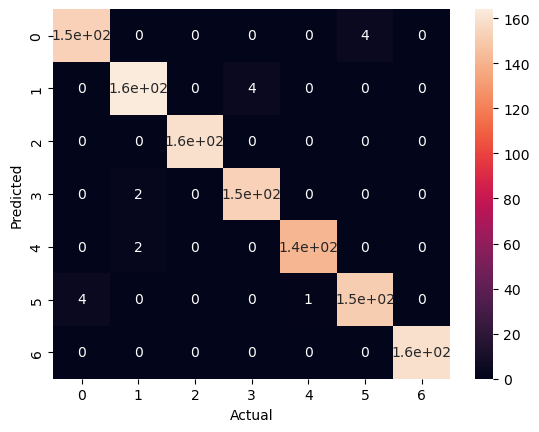

In [165]:
sns.heatmap(con8,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [166]:
acc8=accuracy_score(y_test,y_pre_bag)
print('The accuracy score is = '+str(acc8))

The accuracy score is = 0.9845031905195989


In [167]:
cal8=classification_report(y_test,y_pre_bag)
print(cal8)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.98      0.98      0.98       168
           2       1.00      1.00      1.00       159
           3       0.97      0.99      0.98       155
           4       0.99      0.99      0.99       143
           5       0.97      0.97      0.97       156
           6       1.00      1.00      1.00       159

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [168]:
bag_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_bag})
bag_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong Predictions are

In [169]:
K=len(bag_df.loc[bag_df['Actual']!=bag_df['Predicted']])
K

17

# Boosting

In [170]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


## Ada Boost

In [171]:
ada=AdaBoostClassifier(base_estimator=ran,n_estimators=100,random_state=1)
ada.fit(x_train,y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=100, random_state=1)

In [172]:
y_pre_bo=ada.predict(x_test)

In [173]:
ada.score(x_test,y_test)

0.9863263445761167

In [174]:
ada.score(x_train,y_train)

1.0

## Performing matrix

In [175]:
con9=confusion_matrix(y_test,y_pre_bo)

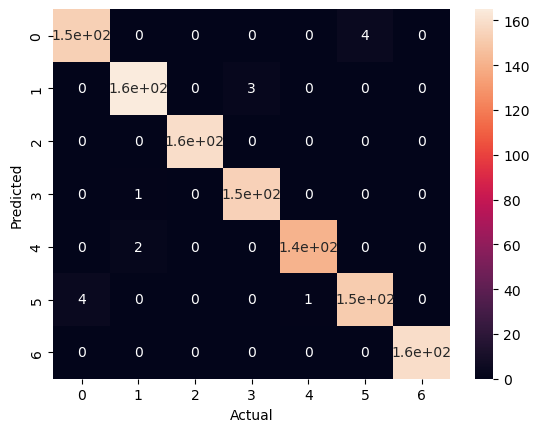

In [176]:
sns.heatmap(con9,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [177]:
acc9=accuracy_score(y_test,y_pre_bo)
print('The accuracy score is = '+str(acc9))

The accuracy score is = 0.9863263445761167


In [178]:
cal9=classification_report(y_test,y_pre_bo)
print(cal9)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.98      0.98      0.98       168
           2       1.00      1.00      1.00       159
           3       0.98      0.99      0.99       155
           4       0.99      0.99      0.99       143
           5       0.97      0.97      0.97       156
           6       1.00      1.00      1.00       159

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



In [179]:
ada_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_bo})
ada_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


## Number of wrong Predictions are 

In [180]:
L=len(ada_df.loc[ada_df['Actual']!=ada_df['Predicted']])
L

15

## Gradien Boost 

In [181]:
lr=[0.05,1,0.75,0.25,0.5,0.025,0.9,0.2,0.8,0.22]
for l in lr:
    gb=GradientBoostingClassifier(random_state=1,learning_rate=l)
    gb.fit(x_train,y_train)
    print('Learning rate = '+str(l))
    print('Testing accuracy = {}'.format(gb.score(x_test,y_test)))
    print('Training accuracy = {}'.format(gb.score(x_train,y_train)))


Learning rate = 0.05
Testing accuracy = 0.9817684594348223
Training accuracy = 0.9996089166992569
Learning rate = 1
Testing accuracy = 0.18231540565177756
Training accuracy = 0.2033633163863903
Learning rate = 0.75
Testing accuracy = 0.98359161349134
Training accuracy = 1.0
Learning rate = 0.25
Testing accuracy = 0.9817684594348223
Training accuracy = 1.0
Learning rate = 0.5
Testing accuracy = 0.9854147675478578
Training accuracy = 1.0
Learning rate = 0.025
Testing accuracy = 0.9790337283500455
Training accuracy = 0.992960500586625
Learning rate = 0.9
Testing accuracy = 0.022789425706472195
Training accuracy = 0.01994524833789597
Learning rate = 0.2
Testing accuracy = 0.9826800364630811
Training accuracy = 1.0
Learning rate = 0.8
Testing accuracy = 0.9790337283500455
Training accuracy = 0.9996089166992569
Learning rate = 0.22
Testing accuracy = 0.9854147675478578
Training accuracy = 1.0


In [182]:
y_pre_gb=gb.predict(x_test)

In [183]:
gb.score(x_test,y_test)

0.9854147675478578

## Depth

In [184]:
for d1 in range(1,9):
    gb1=GradientBoostingClassifier(max_depth=d1,random_state=0)
    gb1.fit(x_train,y_train)
    print('Max_depth = '+str(d1))
    print('In testing {}'.format(gb1.score(x_test,y_test)))
    print('in training {}'.format(gb1.score(x_train,y_train)))

Max_depth = 1
In testing 0.9826800364630811
in training 0.9925694172858819
Max_depth = 2
In testing 0.9817684594348223
in training 1.0
Max_depth = 3
In testing 0.9863263445761167
in training 1.0
Max_depth = 4
In testing 0.9826800364630811
in training 1.0
Max_depth = 5
In testing 0.98359161349134
in training 1.0
Max_depth = 6
In testing 0.9817684594348223
in training 1.0
Max_depth = 7
In testing 0.9790337283500455
in training 1.0
Max_depth = 8
In testing 0.96718322698268
in training 1.0


In [185]:
gb4=GradientBoostingClassifier()
gb4.fit(x_train,y_train)

GradientBoostingClassifier()

In [186]:
y_pre_gb4=gb4.predict(x_test)

In [187]:
gb4.score(x_test,y_test)

0.9863263445761167

In [188]:
gb4.score(x_train,y_train)

1.0

## Performing matrix

In [189]:
con10=confusion_matrix(y_test,y_pre_gb4)

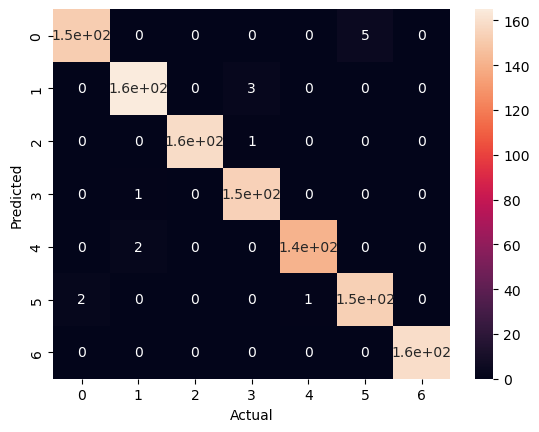

In [190]:
sns.heatmap(con10,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [191]:
acc10=accuracy_score(y_test,y_pre_gb4)
print('The accuracy score is = '+str(acc10))

The accuracy score is = 0.9863263445761167


In [192]:
cal10=classification_report(y_test,y_pre_gb4)
print(cal10)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.98      0.98      0.98       168
           2       1.00      0.99      1.00       159
           3       0.97      0.99      0.98       155
           4       0.99      0.99      0.99       143
           5       0.97      0.98      0.97       156
           6       1.00      1.00      1.00       159

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



In [193]:
G_bp_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_gb4})
G_bp_df

,Actual,Predicted
2838,5,5
2575,4,4
999,1,1
3315,6,6
2465,4,4
...,...,...
1122,2,2
778,1,1
984,1,1
3062,5,5


##  Number of wrong Predictions are

In [194]:
M=len(G_bp_df.loc[G_bp_df['Actual']!=G_bp_df['Predicted']])
M

15

# Comparison

In [195]:
com_df=pd.DataFrame({'Algorithm':['Logistic','Decision Tree','RBF_svc','Linear_svc','Poly_svc','Sigmoid_svc','Random Forest','KNN','Naive bayes','Voting','Bagging','Boosting-(ada)','Gradien'],
                    'Accuracy':[acc1,acc2,accr,accl,accp,accs,acc4,acc5,acc6,acc7,acc8,acc9,acc10],
                    'Wrong Prediction rate':[A,B,C,D,E,F,G,H,I,J,K,L,M]})
com_df

,Algorithm,Accuracy,Wrong Prediction rate
0,Logistic,0.972653,30
1,Decision Tree,0.941659,64
2,RBF_svc,0.979034,23
3,Linear_svc,0.979945,22
4,Poly_svc,0.976299,26
5,Sigmoid_svc,0.885141,126
6,Random Forest,0.987238,14
7,KNN,0.971741,31
8,Naive bayes,0.960802,43
9,Voting,0.984503,17


# Visualization

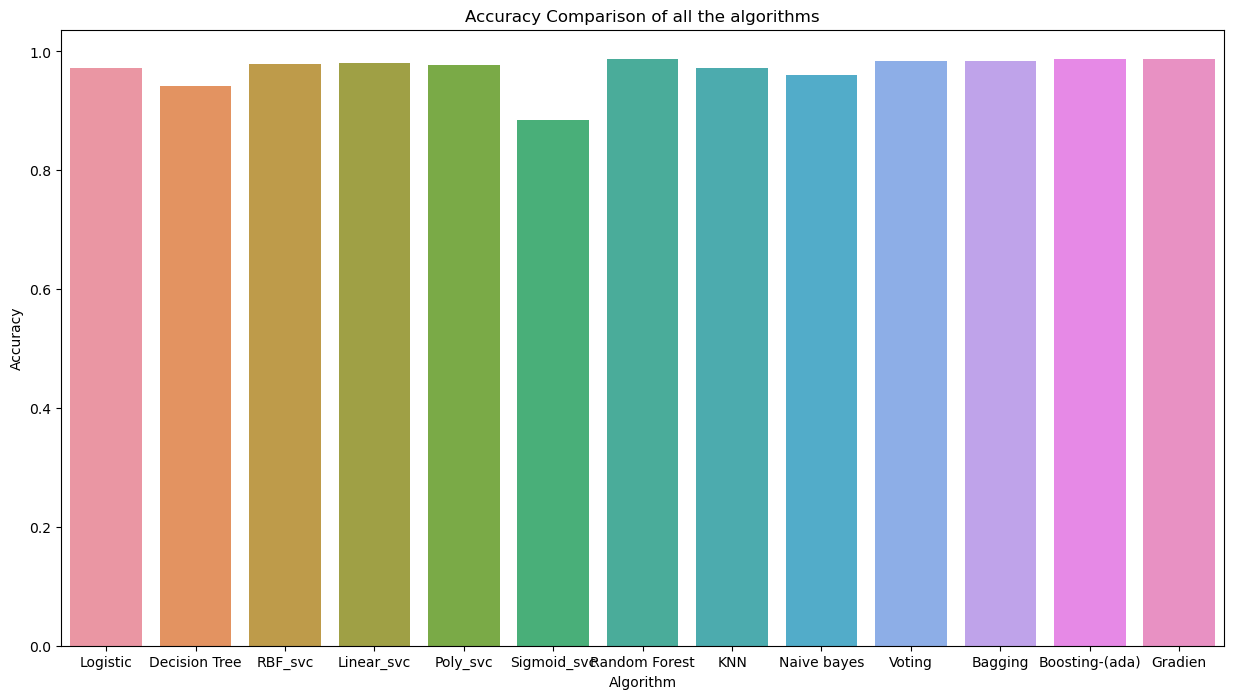

In [196]:
plt.figure(figsize=(15,8))
sns.barplot(x=com_df['Algorithm'],y=com_df['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of all the algorithms')
plt.show()

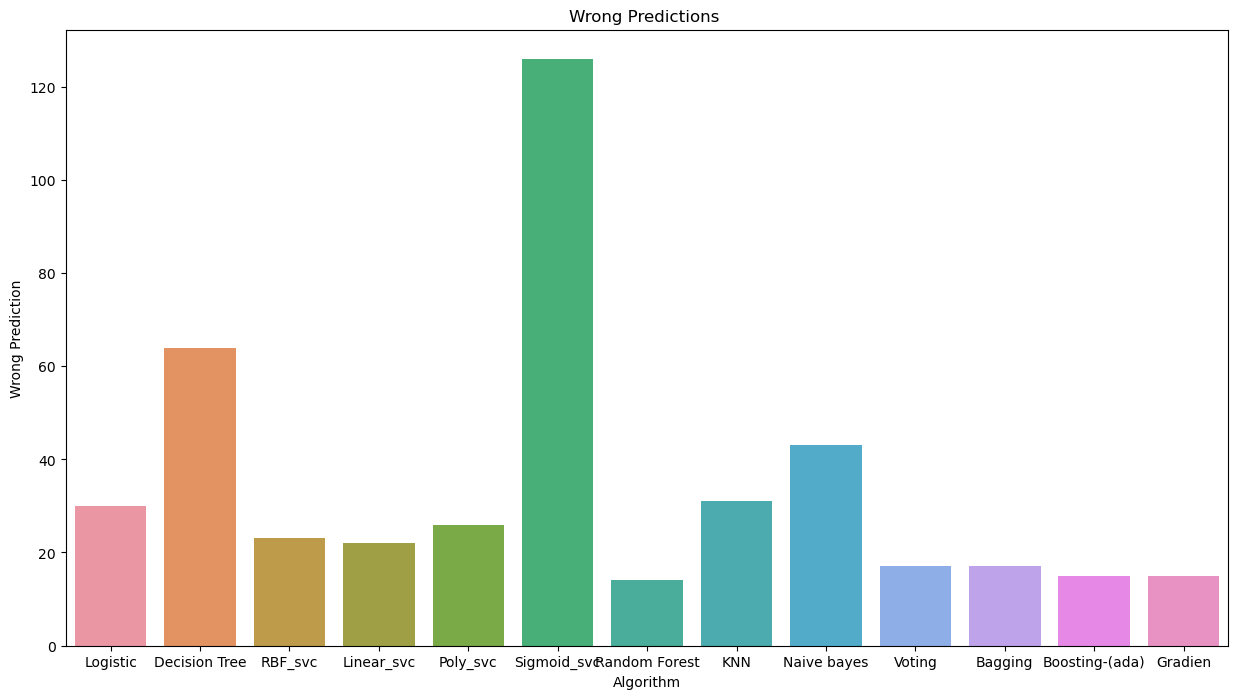

In [197]:
plt.figure(figsize=(15,8))
sns.barplot(x=com_df['Algorithm'],y=com_df['Wrong Prediction rate'])
plt.xlabel('Algorithm')
plt.ylabel('Wrong Prediction')
plt.title('Wrong Predictions ')
plt.show()